<a href="https://colab.research.google.com/github/BaoGiang-Tran/RandomForestClassifier---Taxi-Trip---Fare-Prediction/blob/main/Random_Forest_Model_Taxi_Trip.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from google.colab import drive

drive.mount('/content/drive')

# Read the CSV file from the specified path
df = pd.read_csv('/content/drive/My Drive/taxi_trip/taxi_trip.csv')

df.head()


Mounted at /content/drive


,unique_key,taxi_id,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_community_area,dropoff_community_area,fare,tips,tolls,extras,trip_total,payment_type,company,trip_startdate,trip_enddate,time_start
0,769974aaa7535f9a826e6b568eb220bdc096c81b,1e17dd9f6bce9b805ec3f6c6b510caa5a64e4b67e9f3b7...,2022-10-31 23:45:00 UTC,2022-11-01 00:15:00 UTC,1639.0,19.20,76.0,28.0,46.50,5.0,0.0,4.0,56.00,Credit Card,City Service,2022-10-31,2022-11-01,23:45:00
1,769b21b7a6c2f3e401ea0988b4e6b09bd5791d14,d0cd60cfd2405562733ddd1ea3aba9be5ce4f20bc622c5...,2022-10-31 21:00:00 UTC,2022-11-01 10:30:00 UTC,48669.0,5.82,6.0,2.0,17.25,0.0,0.0,0.0,17.25,Cash,Sun Taxi,2022-10-31,2022-11-01,21:00:00
2,740069ba557902107f219c918fd46a156fabf37c,1d25c733bf526c55bcf3db1fd3856ba10b1064bd98ffce...,2022-10-31 23:45:00 UTC,2022-11-01 00:15:00 UTC,1800.0,18.50,56.0,3.0,45.50,0.0,0.0,4.0,49.50,Cash,Taxi Affiliation Services,2022-10-31,2022-11-01,23:45:00
3,491f41977a38306f5b1d89de3e87168514d004f1,c57508f365f1bdac3be5e7de12fb19c8d669c37d515e41...,2022-10-31 23:45:00 UTC,2022-11-01 00:00:00 UTC,376.0,1.22,28.0,8.0,6.50,3.0,0.0,0.0,10.00,Credit Card,5 Star Taxi,2022-10-31,2022-11-01,23:45:00
4,3cb522b4686547f72806aba7316cc39999f3055e,ddc0a237498a82a0803761188d0ea048623b5d91f29ad2...,2022-10-31 19:30:00 UTC,2022-11-01 04:00:00 UTC,30203.0,0.00,60.0,60.0,3.25,0.0,0.0,0.0,3.25,Cash,Flash Cab,2022-10-31,2022-11-01,19:30:00


# **Data Processing**

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#read tail of dataframe
df.tail()

,unique_key,taxi_id,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_community_area,dropoff_community_area,fare,tips,tolls,extras,trip_total,payment_type,company,trip_startdate,trip_enddate,time_start
48186,baf232717966b9a0671b85aa6eac7932a4115af3,5386b76b5418d11895d0e7303b3be997cb010161807004...,2023-12-20 19:30:00 UTC,2023-12-20 19:30:00 UTC,307.0,0.86,28.0,28.0,9.0,2.22,0.0,0.0,11.22,Mobile,Blue Ribbon Taxi Association,2023-12-20,2023-12-20,19:30:00
48187,bb7b2aa449a91b447c6b214737df50aaf91d1740,644680ecf5bbb5af6329b0c9d4595c39344cd6c50fabab...,2023-12-20 09:15:00 UTC,2023-12-20 09:45:00 UTC,1374.0,17.25,76.0,28.0,42.5,0.00,0.0,4.0,46.50,Cash,Sun Taxi,2023-12-20,2023-12-20,09:15:00
48188,bea717d41a589eea3a8d9fa1acf7767f80b8cd97,a5773b01fdb93b30f2654acc2ce7fee5319896755a36e8...,2023-12-20 23:15:00 UTC,2023-12-20 23:15:00 UTC,720.0,3.50,33.0,8.0,12.0,0.00,0.0,0.0,12.00,Cash,Taxi Affiliation Services,2023-12-20,2023-12-20,23:15:00
48189,c0fdf5f36a7a1e2ab0adb6cbc1bad61e1d72259e,e637e1afe0dab0e2d04c635335602caf1045d43e3741c2...,2023-12-20 19:15:00 UTC,2023-12-20 19:30:00 UTC,420.0,0.00,7.0,7.0,6.0,10.00,0.0,0.0,16.00,Credit Card,Taxi Affiliation Services,2023-12-20,2023-12-20,19:15:00
48190,bb938790070cc4582307e03ab2deb72254acbdb9,b875e9e053d893ee490e723c96773ed5f81c0a2339545f...,2023-12-20 23:30:00 UTC,2023-12-20 23:45:00 UTC,213.0,0.41,28.0,28.0,4.5,0.00,0.0,0.0,4.50,Cash,Taxicab Insurance Agency Llc,2023-12-20,2023-12-20,23:30:00


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48191 entries, 0 to 48190
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   unique_key              48191 non-null  object 
 1   taxi_id                 48191 non-null  object 
 2   trip_start_timestamp    48191 non-null  object 
 3   trip_end_timestamp      48189 non-null  object 
 4   trip_seconds            48177 non-null  float64
 5   trip_miles              48191 non-null  float64
 6   pickup_community_area   44706 non-null  float64
 7   dropoff_community_area  43388 non-null  float64
 8   fare                    48110 non-null  float64
 9   tips                    48110 non-null  float64
 10  tolls                   48110 non-null  float64
 11  extras                  48110 non-null  float64
 12  trip_total              48110 non-null  float64
 13  payment_type            48191 non-null  object 
 14  company                 48191 non-null

In [4]:
# Chekc null
df.isna().sum()

unique_key                   0
taxi_id                      0
trip_start_timestamp         0
trip_end_timestamp           2
trip_seconds                14
trip_miles                   0
pickup_community_area     3485
dropoff_community_area    4803
fare                        81
tips                        81
tolls                       81
extras                      81
trip_total                  81
payment_type                 0
company                      0
trip_startdate               0
trip_enddate                 2
time_start                   0
dtype: int64

In [5]:
# read null data
df_null = df[df[['trip_total']].isnull().any(axis=1)]
df_null.head()

,unique_key,taxi_id,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_community_area,dropoff_community_area,fare,tips,tolls,extras,trip_total,payment_type,company,trip_startdate,trip_enddate,time_start
60,dfd47459724d54b22afd12a8c2dc262424138c52,ea1095a215ac661a9a0da3f84747131c7bc3e6b71308b5...,2023-12-25 12:45:00 UTC,2023-12-25 12:45:00 UTC,230.0,1.82,8.0,8.0,NaN,NaN,NaN,NaN,NaN,Cash,City Service,2023-12-25,2023-12-25,12:45:00
299,e38be28ec8824e7d1dc6710cc632b8f2b66c9d5a,5e48748b582fe3c16baf5ac371a27773e8aef2927f3344...,2023-12-21 17:30:00 UTC,2023-12-21 17:30:00 UTC,52.0,0.02,33.0,33.0,NaN,NaN,NaN,NaN,NaN,Cash,Sun Taxi,2023-12-21,2023-12-21,17:30:00
368,ed368912711531a2128aa7c4dd5a882f14558c34,9b6ede7d36f53ba56a1ec8882cc17703224ac426ba9ef9...,2023-12-21 21:45:00 UTC,2023-12-21 22:00:00 UTC,857.0,7.60,32.0,3.0,NaN,NaN,NaN,NaN,NaN,Cash,Taxicab Insurance Agency Llc,2023-12-21,2023-12-21,21:45:00
421,c3fac231f8362fa7db589533c415cf19b147efda,8c76eb82f069c0731a0049cb78898f02cc5ac6990244c9...,2023-12-21 23:00:00 UTC,2023-12-21 23:00:00 UTC,671.0,2.27,32.0,8.0,NaN,NaN,NaN,NaN,NaN,Cash,Sun Taxi,2023-12-21,2023-12-21,23:00:00
761,e44002612b2f9ce8af896f4e96c4b56fb2d03f3c,ed7090d32800eec667900e884a935a298e55efaaaea9d6...,2023-12-22 17:30:00 UTC,2023-12-22 17:30:00 UTC,436.0,1.45,32.0,32.0,NaN,NaN,NaN,NaN,NaN,Cash,City Service,2023-12-22,2023-12-22,17:30:00


In [6]:
df_null.isnull().sum()

unique_key                 0
taxi_id                    0
trip_start_timestamp       0
trip_end_timestamp         0
trip_seconds               6
trip_miles                 0
pickup_community_area      3
dropoff_community_area     5
fare                      81
tips                      81
tolls                     81
extras                    81
trip_total                81
payment_type               0
company                    0
trip_startdate             0
trip_enddate               0
time_start                 0
dtype: int64

In [7]:
df[df[['trip_seconds']].isnull().any(axis =1)]

,unique_key,taxi_id,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_community_area,dropoff_community_area,fare,tips,tolls,extras,trip_total,payment_type,company,trip_startdate,trip_enddate,time_start
159,d108cb503d5dcd4fda750d1f75cf660345e4fa90,5732bb53e9becb096e11b52228bb5079a585622bd15b74...,2023-12-23 10:45:00 UTC,NaN,NaN,0.00,32.0,NaN,0.00,0.0,0.0,0.0,0.00,Unknown,Taxi Affiliation Services,2023-12-23,NaN,10:45:00
169,d612b865166e9b2ed2d9794947daabe167993fc7,95e2243f1be3ddd4b546741f6176fb12f2101fdc321377...,2023-12-18 14:00:00 UTC,NaN,NaN,0.00,76.0,NaN,0.00,0.0,0.0,0.0,0.00,Unknown,312 Medallion Management Corp,2023-12-18,NaN,14:00:00
1736,c2b76d86a8b467d94388731c350936b8cb16b1b9,020ac8feafd80a884d635ff8ffced25759473215d80a58...,2023-12-24 13:45:00 UTC,2023-12-26 18:45:00 UTC,NaN,22.50,76.0,38.0,69.45,0.0,0.0,0.0,69.45,Cash,Flash Cab,2023-12-24,2023-12-26,13:45:00
7848,fbb6989fc9dd78cffff0e0f7a5be777aee02d2f1,bcfe2033955fd875c28de81fb341df4eb26fd7b2a4fb5c...,2022-10-01 19:15:00 UTC,2022-10-03 11:00:00 UTC,NaN,19.73,32.0,76.0,51.00,0.0,0.0,0.0,51.00,Cash,Chicago Independents,2022-10-01,2022-10-03,19:15:00
9170,4eabc94a8fc52536b0123861e14042e495ec53b9,c8c3f1713dadc77d30d959755c933092b402d0c3cef08e...,2022-10-04 07:30:00 UTC,2022-10-05 08:45:00 UTC,NaN,0.00,2.0,2.0,3.25,0.0,0.0,0.0,3.25,Cash,Medallion Leasin,2022-10-04,2022-10-05,07:30:00
11860,82f92a89ee3daef9b013683d5d738f1107c5ae81,54261c4478178958a389e0bed288628e35fa2c34f4f54a...,2022-10-07 16:45:00 UTC,2022-10-07 16:45:00 UTC,NaN,0.04,32.0,32.0,NaN,NaN,NaN,NaN,NaN,Cash,Chicago Independents,2022-10-07,2022-10-07,16:45:00
20875,416f3e5797b441761abd842c968e6e31136e9cd7,a83d0757369e84e2567b6d31793b04221b7087c4f99083...,2022-10-15 13:15:00 UTC,2022-10-15 13:15:00 UTC,NaN,0.00,6.0,6.0,NaN,NaN,NaN,NaN,NaN,Cash,Flash Cab,2022-10-15,2022-10-15,13:15:00
25202,75e52309aee297e53d7f1420f8522b5667cdba59,f1fd560a990cda532e4800ed7ef0894d1719d8c07e648c...,2022-10-19 16:45:00 UTC,2022-10-19 16:45:00 UTC,NaN,0.00,73.0,73.0,NaN,NaN,NaN,NaN,NaN,Cash,Flash Cab,2022-10-19,2022-10-19,16:45:00
28094,d42e9288f956278bc930f407877a868535ac9790,4b1548922ea8515b87449b239072d0729620c8de72b320...,2022-10-21 11:00:00 UTC,2022-10-21 11:00:00 UTC,NaN,0.00,15.0,15.0,NaN,NaN,NaN,NaN,NaN,Cash,Sun Taxi,2022-10-21,2022-10-21,11:00:00
30954,80435b54498d8cd1605157ce7999d66372817c47,ae5d0e12faea0263e7935303ef8e263cafb033c70eb3c8...,2022-10-22 15:00:00 UTC,2022-10-24 13:45:00 UTC,NaN,12.14,8.0,8.0,48.75,0.0,0.0,0.0,48.75,Cash,Sun Taxi,2022-10-22,2022-10-24,15:00:00


In [8]:
# drop null
df = df.dropna(subset = ['trip_total'])
df.isnull().sum()

unique_key                   0
taxi_id                      0
trip_start_timestamp         0
trip_end_timestamp           2
trip_seconds                 8
trip_miles                   0
pickup_community_area     3482
dropoff_community_area    4798
fare                         0
tips                         0
tolls                        0
extras                       0
trip_total                   0
payment_type                 0
company                      0
trip_startdate               0
trip_enddate                 2
time_start                   0
dtype: int64

In [9]:
#Extract year, month, quarter, month_name and week from trip_startdate
df['trip_startdate'] = pd.to_datetime(df['trip_startdate'])

df['year'] = df['trip_startdate'].dt.year
df['month'] = df['trip_startdate'].dt.month
df['quarter'] = df['trip_startdate'].dt.quarter
#df['week'] = df['trip_startdate'].dt.week
df['month_name'] = df['trip_startdate'].dt.strftime('%B')

df['trip_enddate'] = pd.to_datetime(df['trip_enddate'])
df['trip_duration_days'] = (df['trip_enddate'] - df['trip_startdate']).dt.days

df.head()


,unique_key,taxi_id,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_community_area,dropoff_community_area,fare,tips,...,payment_type,company,trip_startdate,trip_enddate,time_start,year,month,quarter,month_name,trip_duration_days
0,769974aaa7535f9a826e6b568eb220bdc096c81b,1e17dd9f6bce9b805ec3f6c6b510caa5a64e4b67e9f3b7...,2022-10-31 23:45:00 UTC,2022-11-01 00:15:00 UTC,1639.0,19.20,76.0,28.0,46.50,5.0,...,Credit Card,City Service,2022-10-31,2022-11-01,23:45:00,2022,10,4,October,1.0
1,769b21b7a6c2f3e401ea0988b4e6b09bd5791d14,d0cd60cfd2405562733ddd1ea3aba9be5ce4f20bc622c5...,2022-10-31 21:00:00 UTC,2022-11-01 10:30:00 UTC,48669.0,5.82,6.0,2.0,17.25,0.0,...,Cash,Sun Taxi,2022-10-31,2022-11-01,21:00:00,2022,10,4,October,1.0
2,740069ba557902107f219c918fd46a156fabf37c,1d25c733bf526c55bcf3db1fd3856ba10b1064bd98ffce...,2022-10-31 23:45:00 UTC,2022-11-01 00:15:00 UTC,1800.0,18.50,56.0,3.0,45.50,0.0,...,Cash,Taxi Affiliation Services,2022-10-31,2022-11-01,23:45:00,2022,10,4,October,1.0
3,491f41977a38306f5b1d89de3e87168514d004f1,c57508f365f1bdac3be5e7de12fb19c8d669c37d515e41...,2022-10-31 23:45:00 UTC,2022-11-01 00:00:00 UTC,376.0,1.22,28.0,8.0,6.50,3.0,...,Credit Card,5 Star Taxi,2022-10-31,2022-11-01,23:45:00,2022,10,4,October,1.0
4,3cb522b4686547f72806aba7316cc39999f3055e,ddc0a237498a82a0803761188d0ea048623b5d91f29ad2...,2022-10-31 19:30:00 UTC,2022-11-01 04:00:00 UTC,30203.0,0.00,60.0,60.0,3.25,0.0,...,Cash,Flash Cab,2022-10-31,2022-11-01,19:30:00,2022,10,4,October,1.0


In [10]:
df['trip_duration_days'].unique()

array([ 1.,  0., nan,  2.])

In [11]:
#check trip_duration_days = 2
df[df['trip_duration_days'] == 2]

,unique_key,taxi_id,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_community_area,dropoff_community_area,fare,tips,...,payment_type,company,trip_startdate,trip_enddate,time_start,year,month,quarter,month_name,trip_duration_days
1736,c2b76d86a8b467d94388731c350936b8cb16b1b9,020ac8feafd80a884d635ff8ffced25759473215d80a58...,2023-12-24 13:45:00 UTC,2023-12-26 18:45:00 UTC,NaN,22.50,76.0,38.0,69.45,0.0,...,Cash,Flash Cab,2023-12-24,2023-12-26,13:45:00,2023,12,4,December,2.0
7848,fbb6989fc9dd78cffff0e0f7a5be777aee02d2f1,bcfe2033955fd875c28de81fb341df4eb26fd7b2a4fb5c...,2022-10-01 19:15:00 UTC,2022-10-03 11:00:00 UTC,NaN,19.73,32.0,76.0,51.00,0.0,...,Cash,Chicago Independents,2022-10-01,2022-10-03,19:15:00,2022,10,4,October,2.0
30954,80435b54498d8cd1605157ce7999d66372817c47,ae5d0e12faea0263e7935303ef8e263cafb033c70eb3c8...,2022-10-22 15:00:00 UTC,2022-10-24 13:45:00 UTC,NaN,12.14,8.0,8.0,48.75,0.0,...,Cash,Sun Taxi,2022-10-22,2022-10-24,15:00:00,2022,10,4,October,2.0
40618,c8432b8d8e574c15ab21cc5ac3af9c0e8cc952e2,32f41dbfab64ed45d31d672512bf4528d078682d839f30...,2023-12-01 20:15:00 UTC,2023-12-03 17:00:00 UTC,NaN,1.37,32.0,NaN,7.00,4.0,...,Cash,Flash Cab,2023-12-01,2023-12-03,20:15:00,2023,12,4,December,2.0


In [12]:
df[df[['trip_duration_days']].isnull().any(axis = 1)]

,unique_key,taxi_id,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_community_area,dropoff_community_area,fare,tips,...,payment_type,company,trip_startdate,trip_enddate,time_start,year,month,quarter,month_name,trip_duration_days
159,d108cb503d5dcd4fda750d1f75cf660345e4fa90,5732bb53e9becb096e11b52228bb5079a585622bd15b74...,2023-12-23 10:45:00 UTC,NaN,NaN,0.0,32.0,NaN,0.0,0.0,...,Unknown,Taxi Affiliation Services,2023-12-23,NaT,10:45:00,2023,12,4,December,NaN
169,d612b865166e9b2ed2d9794947daabe167993fc7,95e2243f1be3ddd4b546741f6176fb12f2101fdc321377...,2023-12-18 14:00:00 UTC,NaN,NaN,0.0,76.0,NaN,0.0,0.0,...,Unknown,312 Medallion Management Corp,2023-12-18,NaT,14:00:00,2023,12,4,December,NaN


In [13]:
# drop null from trip_duration_days
df = df.dropna(subset = ['trip_duration_days'])

# **EDA - Exploratery Data Analysis**

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48108 entries, 0 to 48190
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   unique_key              48108 non-null  object        
 1   taxi_id                 48108 non-null  object        
 2   trip_start_timestamp    48108 non-null  object        
 3   trip_end_timestamp      48108 non-null  object        
 4   trip_seconds            48102 non-null  float64       
 5   trip_miles              48108 non-null  float64       
 6   pickup_community_area   44626 non-null  float64       
 7   dropoff_community_area  43312 non-null  float64       
 8   fare                    48108 non-null  float64       
 9   tips                    48108 non-null  float64       
 10  tolls                   48108 non-null  float64       
 11  extras                  48108 non-null  float64       
 12  trip_total              48108 non-null  float64    

## **Analyze miles and fare variable**

Correlation between distance and fare: 0.8160088906150698


--- Skewness and Kurtosis ---
Skewness of distance: 1.919981481229612
Kurtosis of distance: 12.329518176221859
Skewness of fare: 3.215464244539951
Kurtosis of fare: 49.86874284067305


--- Parameter center---
         trip_miles          fare
count  48108.000000  48108.000000
mean       6.427052     22.076866
std        6.814199     17.007176
min        0.000000      0.000000
25%        0.900000      9.250000
50%        3.900000     17.765000
75%       10.950000     31.250000
max      153.290000    565.250000


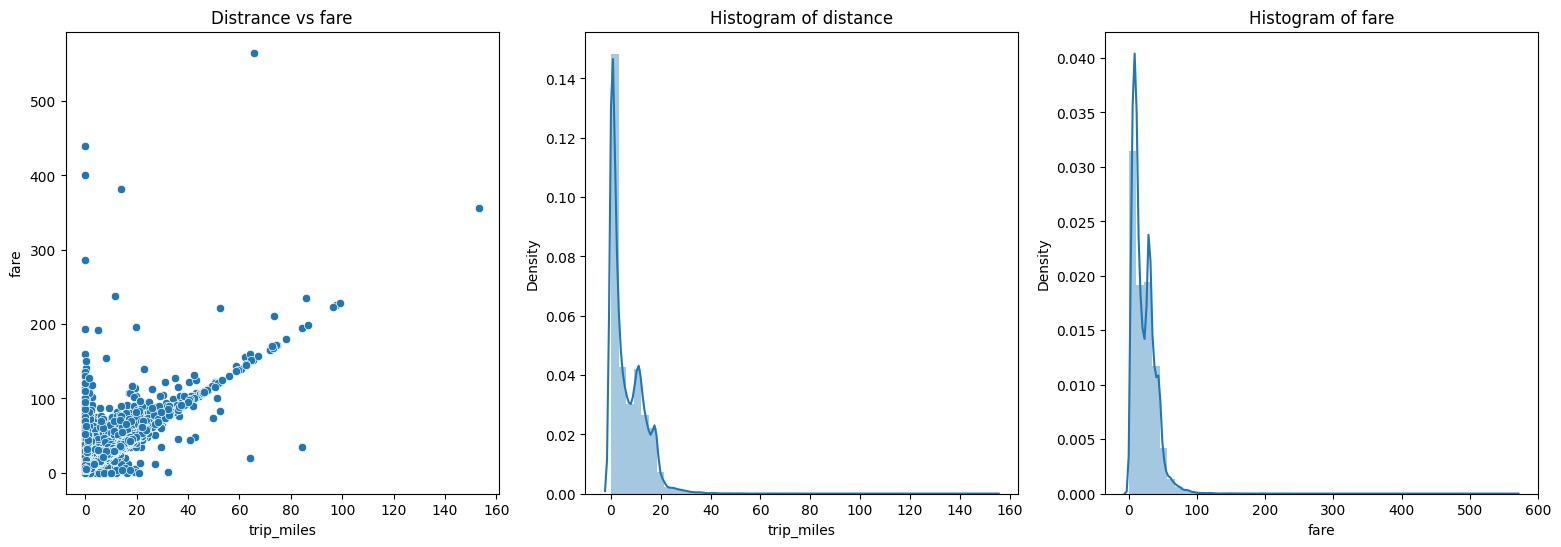

In [15]:
# Distance vs. fare:
# You can plot trip distance (trip_miles) against fare to see if there is a correlation between the two.
# This could help you understand how taxi fares are priced.

# Calculate correlation coefficient
corr = df['trip_miles'].corr(df['fare'])
print("Correlation between distance and fare:",corr)
print("\n")
import scipy.stats as stats
# Calculate Kweness and Kurtosis of trip_taxi and fare
skewness_miles = stats.skew(df['trip_miles'])
kurtosis_miles = stats.kurtosis(df['trip_miles'])

kur_fare = stats.kurtosis(df['fare'])
skew_fare = stats.skew(df['fare'])

# Print the results
print("--- Skewness and Kurtosis ---")
print("Skewness of distance:", skewness_miles)
print("Kurtosis of distance:", kurtosis_miles)
print("Skewness of fare:", skew_fare)
print("Kurtosis of fare:", kur_fare)

# print describe
print("\n")
print("--- Parameter center---")
print(df[['trip_miles','fare']].describe())

# create scatter chart

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (19,6))
sns.scatterplot(data=df, x='trip_miles', y='fare', ax = ax1).set_title('Distrance vs fare')
sns.distplot(df['trip_miles'], ax = ax2).set_title('Histogram of distance')
sns.distplot(df['fare'], ax = ax3).set_title('Histogram of fare')
plt.show()

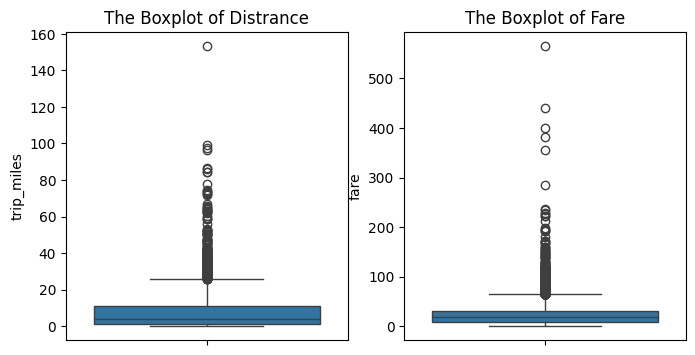

In [16]:
# Boxplot for distance and fare
f, (ax1,ax2) = plt.subplots(1,2, figsize = (8,4))
sns.boxplot(df['trip_miles'], ax = ax1).set_title('The Boxplot of Distrance')
sns.boxplot(df['fare'], ax = ax2).set_title('The Boxplot of Fare')

plt.show()

In [17]:
# Define outlier of trip_miles and fare
import statistics as st

def interquartile_range_method(data,variable):
  #find Q1, Q3, and interquartile range
  Q1 = data['variable'].quantile(q=0.25)
  Q3 = data['variable'].quantile(q=0.75)
  IQR = data['variable'].apply(st.iqr)
  data_clean_iqr_range = data['variable'][~((data['variable'] < (Q1 - 1.5*IQR))|(data['variable'] > (Q3 + 1.5*IQR))).any(axis = 1)]

In [18]:
# Calculate Q1, Q3 and IQR of trip_miles
Q1 = np.quantile(df['trip_miles'],0.25)
Q3 = np.quantile(df['trip_miles'],0.75)
IQR = Q3 - Q1
print('IQR of Distance:',IQR)

#Calculate amount of outlier
up_outlier_distance = df[df['trip_miles']>(Q3 + 1.5*IQR)]
print('Amount of upper outlier of trip miles:', up_outlier_distance.shape[0])

low_outlier_distance = df[df['trip_miles'] < (Q1 - 1.5*IQR)]
print('Amount of lower outlier of trip miles:', low_outlier_distance.shape[0])

#Percentage of outlier in dataset
print('Percentage of upper outlier trip miles:',round(up_outlier_distance.shape[0]/len(df)*100,2),"%")
print('Percentage of lower outlier trip miles:',round(low_outlier_distance.shape[0]/len(df)*100,2),"%")
#-------------------------------#

# Calculate Q1, Q3 and IQR of trip_miles
Q1_fare = np.quantile(df['fare'],0.25)
Q3_fare = np.quantile(df['fare'],0.75)
IQR_fare = Q3_fare - Q1_fare
print('\n')
print('IQR of Fare:',IQR_fare)

#Calculate amount of outlier
up_outlier_fare = df[df['fare']>(Q3_fare + 1.5*IQR_fare)]
print('Amount of upper outlier of fare:', up_outlier_fare.shape[0])

low_outlier_fare = df[df['fare'] < (Q1_fare - 1.5*IQR_fare)]
print('Amount of lower outlier of fare:', low_outlier_fare.shape[0])

#Percentage of outlier in dataset
print('Percentage of upper outlier fare:',round(up_outlier_fare.shape[0]/len(df)*100,2),"%")
print('Percentage of lower outlier fare:',round(low_outlier_fare.shape[0]/len(df)*100,2),"%")

IQR of Distance: 10.049999999999999
Amount of upper outlier of trip miles: 527
Amount of lower outlier of trip miles: 0
Percentage of upper outlier trip miles: 1.1 %
Percentage of lower outlier trip miles: 0.0 %


IQR of Fare: 22.0
Amount of upper outlier of fare: 862
Amount of lower outlier of fare: 0
Percentage of upper outlier fare: 1.79 %
Percentage of lower outlier fare: 0.0 %


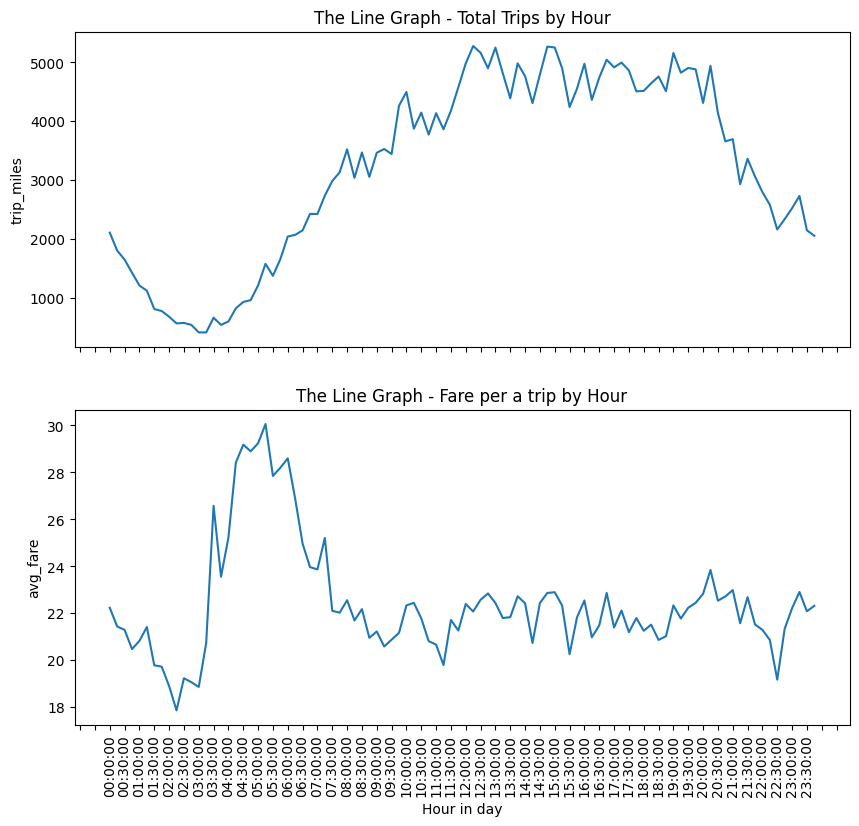

In [19]:
#group trip miles and fare by month and time start
df_hour = df.groupby(['time_start']).agg({
    'trip_miles': sum,
    'fare':sum,
    'taxi_id': len
}).reset_index()

df_hour = df_hour.sort_values(by = ['time_start'])
df_hour['avg_miles'] = round(df_hour['trip_miles']/df_hour['taxi_id'],2)
df_hour['avg_fare'] = round(df_hour['fare']/df_hour['taxi_id'],2)

#create plot
f,(ax1,ax2) = plt.subplots(2,1, sharex = True, figsize =(10,9))
sns.lineplot(x = df_hour['time_start'], y = df_hour['trip_miles'], ax = ax1).set_title('The Line Graph - Total Trips by Hour')
sns.lineplot(x = df_hour['time_start'], y = df_hour['avg_fare'], ax = ax2).set_title('The Line Graph - Fare per a trip by Hour')
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(2))
plt.xticks(rotation = 90)
plt.xlabel('Hour in day')

plt.show()

## **Group by Company: total trip, fare, tips, tolls, extras, total cost and duration**

In [20]:
# group number of trips, miles and fare by company
com = df.groupby(['company']).agg({
    'taxi_id': len,
    'trip_miles': sum,
    'fare': sum,
    'tips':sum,
    'tolls':sum,
    'extras':sum,
    'trip_total':sum,
    'trip_seconds':sum
}).reset_index()

# Sort values by number of trips
com = com.sort_values(by = 'taxi_id', ascending = False).reset_index()
com.drop(columns = 'index', inplace = True)

#create avg
com['miles_trips'] = round(com['trip_miles']/com['taxi_id'],2)
  #This reveals the overall trip distance distribution.
  #A high number of short trips could indicate inner-city usage, while longer trips might suggest airport runs or inter-city travel.

com['fare_trips'] = round(com['fare']/com['taxi_id'],2)
  #This shows the fare distribution.
  #A high number of low fares could indicate budget-friendly services, while high fares might suggest premium services or long trips.

com['tips_trips'] = com['tips']/com['taxi_id']
  #This provides a general sense of customer satisfaction.

com['tolls_trips'] = com['tolls']/com['taxi_id']
  #This highlights how tolls impact fares. A high toll amount could inflate fares in certain areas.

com['extras_trips'] = com['extras']/com['taxi_id']
  #Similar to tolls, this reveals the impact of additional charges on fares.
  #High "extra" amounts could suggest companies relying heavily on surcharges or fees.

com['totalcost_trips'] = com['trip_total']/com['taxi_id']

com['duration_trip'] = com['trip_seconds']/com['taxi_id']

ana_trips = com[['company','miles_trips','fare_trips','tips_trips','tolls_trips','extras_trips','totalcost_trips','duration_trip']]
ana_trips = ana_trips.round(2)
ana_trips

,company,miles_trips,fare_trips,tips_trips,tolls_trips,extras_trips,totalcost_trips,duration_trip
0,Flash Cab,6.65,22.41,1.23,0.00,0.72,24.46,1264.78
1,Taxi Affiliation Services,3.87,20.97,0.94,0.01,2.24,24.15,1101.75
2,Sun Taxi,6.45,20.79,2.74,0.03,2.03,25.84,1274.04
3,City Service,7.26,22.30,3.03,0.03,2.07,27.67,1297.62
4,5 Star Taxi,6.94,22.98,2.26,0.00,1.87,27.28,1487.25
5,Chicago Independents,7.39,23.08,3.84,0.05,3.08,30.31,1288.31
6,Globe Taxi,6.35,19.80,2.58,0.03,1.78,24.39,1142.69
7,Taxicab Insurance Agency Llc,7.73,24.13,2.89,0.06,4.01,31.28,1326.55
8,Medallion Leasin,7.99,23.67,3.38,0.01,2.85,30.20,1363.21
9,Blue Ribbon Taxi Association,7.01,22.62,1.51,0.05,1.44,25.75,1496.39


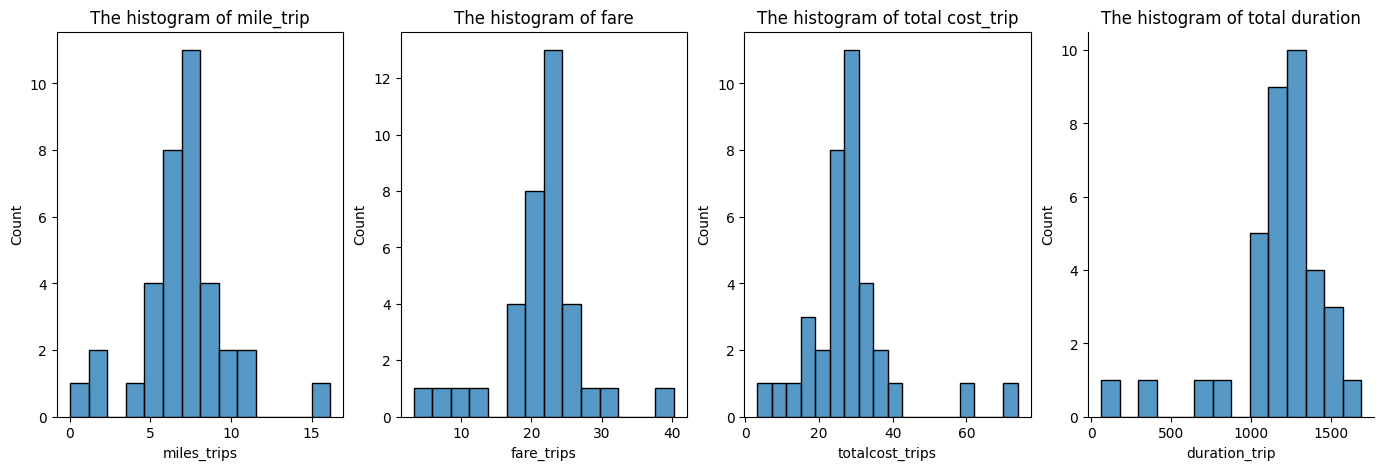

In [21]:

f, (ax1,ax2,ax3,ax4) = plt.subplots(1,4, figsize = (17,5))
sns.histplot(ana_trips['miles_trips'], ax = ax1).set_title('The histogram of mile_trip')
sns.histplot(ana_trips['fare_trips'], ax = ax2).set_title('The histogram of fare')
sns.histplot(ana_trips['totalcost_trips'], ax = ax3).set_title('The histogram of total cost_trip')
sns.histplot(ana_trips['duration_trip'], ax = ax4).set_title('The histogram of total duration')
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.show()

### **Correlation Coefficient**

Correlation coefficient of mile_trip vs. fare_trips: 0.93
Correlation coefficient of mile_trip vs. extras_trips: 0.72
Correlation coefficient of mile_trip vs. duration_trips: 0.61


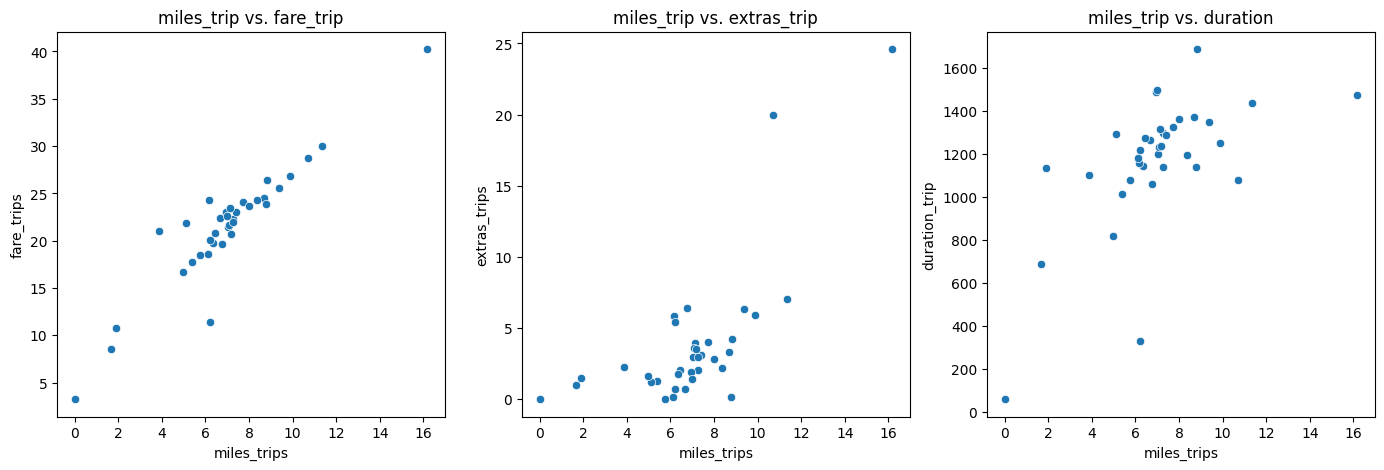

In [22]:
# Calculate the R-squared value
r2_miles = pd.Series.corr(ana_trips['fare_trips'],ana_trips['miles_trips'],)
r2_extras = pd.Series.corr(ana_trips['miles_trips'], ana_trips['extras_trips'])
r2_dur = pd.Series.corr(ana_trips['miles_trips'], ana_trips['duration_trip'])

# Print the R-squared value
print("Correlation coefficient of mile_trip vs. fare_trips:", round(r2_miles,2))
print("Correlation coefficient of mile_trip vs. extras_trips:", round(r2_extras,2))
print("Correlation coefficient of mile_trip vs. duration_trips:", round(r2_dur,2))


f,(ax1,ax2,ax3) = plt.subplots(1,3, figsize =(17,5))
sns.scatterplot(x = ana_trips['miles_trips'], y = ana_trips['fare_trips'], ax = ax1).set_title('miles_trip vs. fare_trip')
sns.scatterplot(x = ana_trips['miles_trips'], y = ana_trips['extras_trips'], ax = ax2).set_title('miles_trip vs. extras_trip')
sns.scatterplot(x = ana_trips['miles_trips'], y = ana_trips['duration_trip'], ax = ax3).set_title('miles_trip vs. duration')
plt.show()

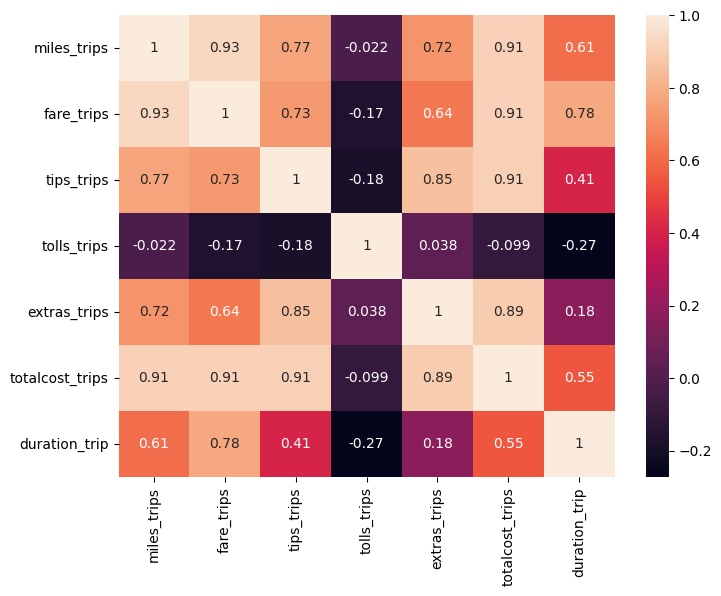

In [23]:
plt.figure(figsize=(8,6))
corrMatrix = ana_trips[['miles_trips','fare_trips','tips_trips','tolls_trips','extras_trips','totalcost_trips','duration_trip']].corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

### **Kmean Cluster**

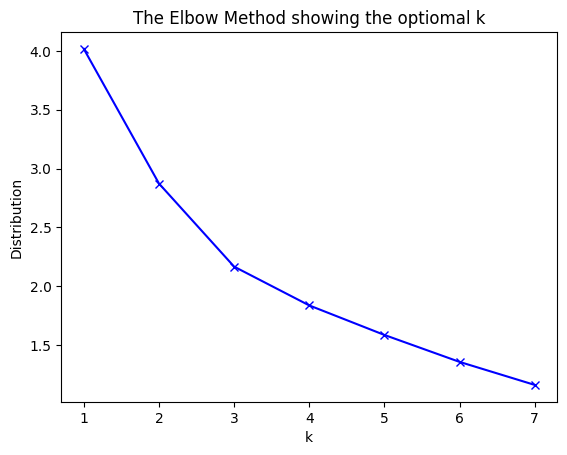

In [24]:
# Apply Kmean to find company group
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

kmean_trips = ana_trips[['miles_trips','tips_trips','extras_trips']]
# k means determine k
distortions = []
K = range(1,8)
for i in K:
  kmeanModel = KMeans(n_clusters=i).fit(kmean_trips)
  kmeanModel.fit(kmean_trips)
  distortions.append(sum(np.min(cdist(kmean_trips, kmeanModel.cluster_centers_,
                                       'euclidean'), axis = 1))/ kmean_trips.shape[0])

# plot the elnbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distribution')
plt.title('The Elbow Method showing the optiomal k')
plt.show()

In [25]:
# select k = 3
kmeans = KMeans(n_clusters = 3)
kmeans.fit(kmean_trips)

centroids = kmeans.cluster_centers_
labels = kmeans.labels_

print(centroids)
print(labels)

[[ 5.198125    1.114375    1.104375  ]
 [13.43        9.475      22.3       ]
 [ 7.87        3.04111111  4.20222222]]
[0 0 0 2 0 2 0 2 2 0 2 2 2 2 2 2 0 0 2 0 2 0 0 2 2 2 2 2 2 0 1 0 0 1 0 0]


In [26]:
ana_trips['group'] = pd.Series(labels)
ana_trips

,company,miles_trips,fare_trips,tips_trips,tolls_trips,extras_trips,totalcost_trips,duration_trip,group
0,Flash Cab,6.65,22.41,1.23,0.00,0.72,24.46,1264.78,0
1,Taxi Affiliation Services,3.87,20.97,0.94,0.01,2.24,24.15,1101.75,0
2,Sun Taxi,6.45,20.79,2.74,0.03,2.03,25.84,1274.04,0
3,City Service,7.26,22.30,3.03,0.03,2.07,27.67,1297.62,2
4,5 Star Taxi,6.94,22.98,2.26,0.00,1.87,27.28,1487.25,0
5,Chicago Independents,7.39,23.08,3.84,0.05,3.08,30.31,1288.31,2
6,Globe Taxi,6.35,19.80,2.58,0.03,1.78,24.39,1142.69,0
7,Taxicab Insurance Agency Llc,7.73,24.13,2.89,0.06,4.01,31.28,1326.55,2
8,Medallion Leasin,7.99,23.67,3.38,0.01,2.85,30.20,1363.21,2
9,Blue Ribbon Taxi Association,7.01,22.62,1.51,0.05,1.44,25.75,1496.39,0


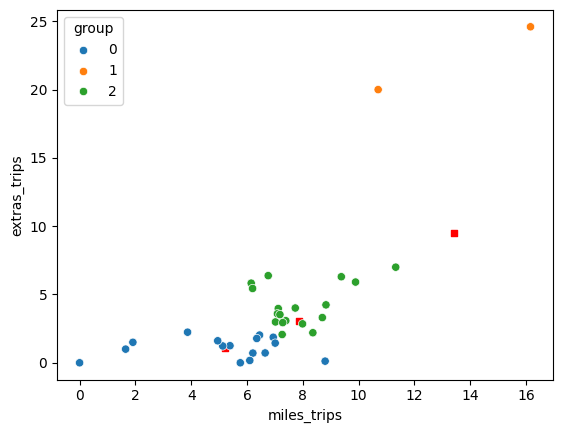

In [27]:
plt.scatter(centroids[:, 0],centroids[:, 1],
marker = "s", s=15, color='red')
sns.scatterplot(data = ana_trips, x='miles_trips', y ='extras_trips',
                hue = 'group', palette = 'tab10', legend = 'full')
plt.show()

In [28]:
# Parameter for each group

i = 0
for cluster in centroids:
  print('Centroid Cluster:' + str(i))
  print('Mile:', round(cluster[0],2))
  print('Tip:', round(cluster[1],2))
  print('Extra:', round(cluster[2],2))
  i = i + 1

Centroid Cluster:0
Mile: 5.2
Tip: 1.11
Extra: 1.1
Centroid Cluster:1
Mile: 13.43
Tip: 9.48
Extra: 22.3
Centroid Cluster:2
Mile: 7.87
Tip: 3.04
Extra: 4.2


In [29]:
com['Company group'] = pd.Series(labels)
df1 = com[['taxi_id','trip_total','miles_trips','fare_trips', 'tips_trips','extras_trips', 'totalcost_trips','duration_trip','Company group']]
company_group = df1.groupby('Company group').mean().round(2)

# Rename columne
company_group = company_group.rename(columns = {
    'taxi_id':'Total trips',
    'trip_total':'Total cost ($)',
    'miles_trips':'Avg miles',
    'fare_trips':'Avg fare ($)',
    'tips_trips':'Avg tips ($)',
    'extras_trips':'Avg extras ($)',
    'totalcost_trips':'Avg cost ($)',
    'duration_trip':'Avg duration (seconds)'

})

#format value
company_group = company_group.astype(float)

#create format value function
def format (x):
  if isinstance(x, float) and np.isfinite(x):
    return '{:,}'.format(x)
  else:
    return x
#apply the format function to all columns in the company group dataframe
company_group = company_group.applymap(format)

company_group



,Total trips,Total cost ($),Avg miles,Avg fare ($),Avg tips ($),Avg extras ($),Avg cost ($),Avg duration (seconds)
Company group,,,,,,,,
0,"2,133.31","53,110.34",5.2,18.08,1.11,1.11,20.38,"1,087.16"
1,3.0,214.18,13.43,34.5,9.48,22.3,66.28,"1,278.0"
2,776.06,"22,925.21",7.87,23.07,3.04,4.2,30.49,"1,236.27"



**- Group 0:** This suggests that Group 0 trips may be longer trips with higher fares, but also with customers who tend to add more extras on top of the base fare.


**- Group 1:**  This suggests that Group 1 trips may be very infrequent long trips with high fares, tips, and extra costs.


**- Group 2:** This suggests that Group 2 trips may be frequent short trips with lower fares, tips and extra costs.


**In conclusion**, Group 0 can consists mostly of business trips while Group 2 consists mostly of personal trips.
To get a better understanding of the groups, I may want to consider looking at other factors besides just miles, tips, and extra elements.  For example, I could look at the time of day the trips were taken, the origin and destination of the trips, or the type of taxi that was used.

## **Peak hour**

In [30]:
# Count the number of trips per hour
trip_counts_by_hour = df['time_start'].value_counts()

# Sort by hour with highest trip count at the top
trip_counts_by_hour = trip_counts_by_hour.sort_values(ascending=False)

# Get the peak hour(s)
peak_hour = trip_counts_by_hour.index[0]

# Check for ties
if len(trip_counts_by_hour) > 1 and trip_counts_by_hour.iloc[1] == trip_counts_by_hour.iloc[0]:
  peak_hour = trip_counts_by_hour.index.tolist()

print("Peak hour(s):", peak_hour)


Peak hour(s): 17:00:00


In [31]:
# group number of trips, miles and fare by company
ph = df.groupby(['company','time_start']).agg({
    'taxi_id': len,
    'trip_miles': sum,
    'fare': sum,
    'tips':sum,
    'tolls':sum,
    'extras':sum,
    'trip_total':sum,
    'trip_seconds':sum
}).reset_index()

# Sort values by number of trips
ph = ph.sort_values(by = 'taxi_id', ascending = False).reset_index()
ph.drop(columns = 'index', inplace = True)

#create avg
ph['miles_trips'] = round(ph['trip_miles']/ph['taxi_id'],2)
  #This reveals the overall trip distance distribution.
  #A high number of short trips could indicate inner-city usage, while longer trips might suggest airport runs or inter-city travel.

ph['fare_trips'] = round(ph['fare']/ph['taxi_id'],2)
  #This shows the fare distribution.
  #A high number of low fares could indicate budget-friendly services, while high fares might suggest premium services or long trips.

ph['tips_trips'] = ph['tips']/ph['taxi_id']
  #This provides a general sense of customer satisfaction.

ph['tolls_trips'] = ph['tolls']/ph['taxi_id']
  #This highlights how tolls impact fares. A high toll amount could inflate fares in certain areas.

ph['extras_trips'] = ph['extras']/ph['taxi_id']
  #Similar to tolls, this reveals the impact of additional charges on fares.
  #High "extra" amounts could suggest companies relying heavily on surcharges or fees.

ph['totalcost_trips'] = ph['trip_total']/ph['taxi_id']

ph['duration_trip'] = ph['trip_seconds']/ph['taxi_id']

#ana_trips = com[['company','miles_trips','fare_trips','tips_trips','tolls_trips','extras_trips','totalcost_trips','duration_trip']]
#ana_trips = ana_trips.round(2)
ph

,company,time_start,taxi_id,trip_miles,fare,tips,tolls,extras,trip_total,trip_seconds,miles_trips,fare_trips,tips_trips,tolls_trips,extras_trips,totalcost_trips,duration_trip
0,Flash Cab,12:00:00,262,1967.98,6497.55,196.74,0.0,111.0,6816.29,348774.0,7.51,24.80,0.750916,0.0,0.423664,26.016374,1331.198473
1,Flash Cab,12:15:00,249,1766.63,5636.29,270.03,0.0,118.0,6060.27,319372.0,7.09,22.64,1.084458,0.0,0.473896,24.338434,1282.618474
2,Flash Cab,11:00:00,246,1508.19,5078.26,141.04,0.0,54.0,5291.80,290928.0,6.13,20.64,0.573333,0.0,0.219512,21.511382,1182.634146
3,Flash Cab,11:45:00,244,1774.34,5619.13,195.32,0.0,108.0,5941.95,316595.0,7.27,23.03,0.800492,0.0,0.442623,24.352254,1297.520492
4,Flash Cab,11:15:00,242,1392.40,4799.33,188.70,0.0,58.5,5062.03,262195.0,5.75,19.83,0.779752,0.0,0.241736,20.917479,1083.450413
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1865,Koam Taxi Association,13:00:00,1,4.00,13.75,0.00,0.0,0.0,13.75,907.0,4.00,13.75,0.000000,0.0,0.000000,13.750000,907.000000
1866,Koam Taxi Association,13:15:00,1,2.53,9.75,0.00,0.0,0.0,9.75,575.0,2.53,9.75,0.000000,0.0,0.000000,9.750000,575.000000
1867,Koam Taxi Association,13:30:00,1,2.18,9.75,0.00,0.0,0.0,9.75,818.0,2.18,9.75,0.000000,0.0,0.000000,9.750000,818.000000
1868,"Taxicab Insurance Agency, LLC",01:00:00,1,11.00,54.00,0.00,0.0,4.0,58.00,2040.0,11.00,54.00,0.000000,0.0,4.000000,58.000000,2040.000000


In [32]:
# merge company group to ph dataframe
ph = ph.merge(com[['company','Company group']], on='company', how='left')
ph

,company,time_start,taxi_id,trip_miles,fare,tips,tolls,extras,trip_total,trip_seconds,miles_trips,fare_trips,tips_trips,tolls_trips,extras_trips,totalcost_trips,duration_trip,Company group
0,Flash Cab,12:00:00,262,1967.98,6497.55,196.74,0.0,111.0,6816.29,348774.0,7.51,24.80,0.750916,0.0,0.423664,26.016374,1331.198473,0
1,Flash Cab,12:15:00,249,1766.63,5636.29,270.03,0.0,118.0,6060.27,319372.0,7.09,22.64,1.084458,0.0,0.473896,24.338434,1282.618474,0
2,Flash Cab,11:00:00,246,1508.19,5078.26,141.04,0.0,54.0,5291.80,290928.0,6.13,20.64,0.573333,0.0,0.219512,21.511382,1182.634146,0
3,Flash Cab,11:45:00,244,1774.34,5619.13,195.32,0.0,108.0,5941.95,316595.0,7.27,23.03,0.800492,0.0,0.442623,24.352254,1297.520492,0
4,Flash Cab,11:15:00,242,1392.40,4799.33,188.70,0.0,58.5,5062.03,262195.0,5.75,19.83,0.779752,0.0,0.241736,20.917479,1083.450413,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1865,Koam Taxi Association,13:00:00,1,4.00,13.75,0.00,0.0,0.0,13.75,907.0,4.00,13.75,0.000000,0.0,0.000000,13.750000,907.000000,0
1866,Koam Taxi Association,13:15:00,1,2.53,9.75,0.00,0.0,0.0,9.75,575.0,2.53,9.75,0.000000,0.0,0.000000,9.750000,575.000000,0
1867,Koam Taxi Association,13:30:00,1,2.18,9.75,0.00,0.0,0.0,9.75,818.0,2.18,9.75,0.000000,0.0,0.000000,9.750000,818.000000,0
1868,"Taxicab Insurance Agency, LLC",01:00:00,1,11.00,54.00,0.00,0.0,4.0,58.00,2040.0,11.00,54.00,0.000000,0.0,4.000000,58.000000,2040.000000,2


In [33]:
group = ph.groupby(['Company group','time_start']).agg({
    'taxi_id': sum,
    'totalcost_trips': sum,
    'duration_trip':sum,
    'fare_trips': sum

}).reset_index()
group['Company group'] = group['Company group'].astype(str)

group['time_start'] = group['time_start'].astype(str)

group['fare_trips'] = group['fare_trips']/group['taxi_id']

group.rename(columns = {
    'taxi_id': 'Total trips',
    'totalcost_trips':'Total cost',
    'duration_trip':'Duration',
    'fare_trips':'Fare'
}, inplace =True)
group = group.round(2)
group = group.sort_values(by =['time_start'], ascending = True)
group.head(10)

,Company group,time_start,Total trips,Total cost,Duration,Fare
0,0,00:00:00,199,230.59,7173.54,0.96
102,2,00:00:00,119,364.60,10127.75,2.23
103,2,00:15:00,114,307.30,8732.53,2.08
1,0,00:15:00,179,196.45,6238.90,0.91
104,2,00:30:00,110,337.17,11488.40,2.27
2,0,00:30:00,176,137.60,7577.00,0.67
3,0,00:45:00,166,185.82,6048.21,0.89
105,2,00:45:00,78,426.75,9937.66,3.07
4,0,01:00:00,139,169.89,7977.59,0.99
106,2,01:00:00,76,287.57,9045.27,2.98


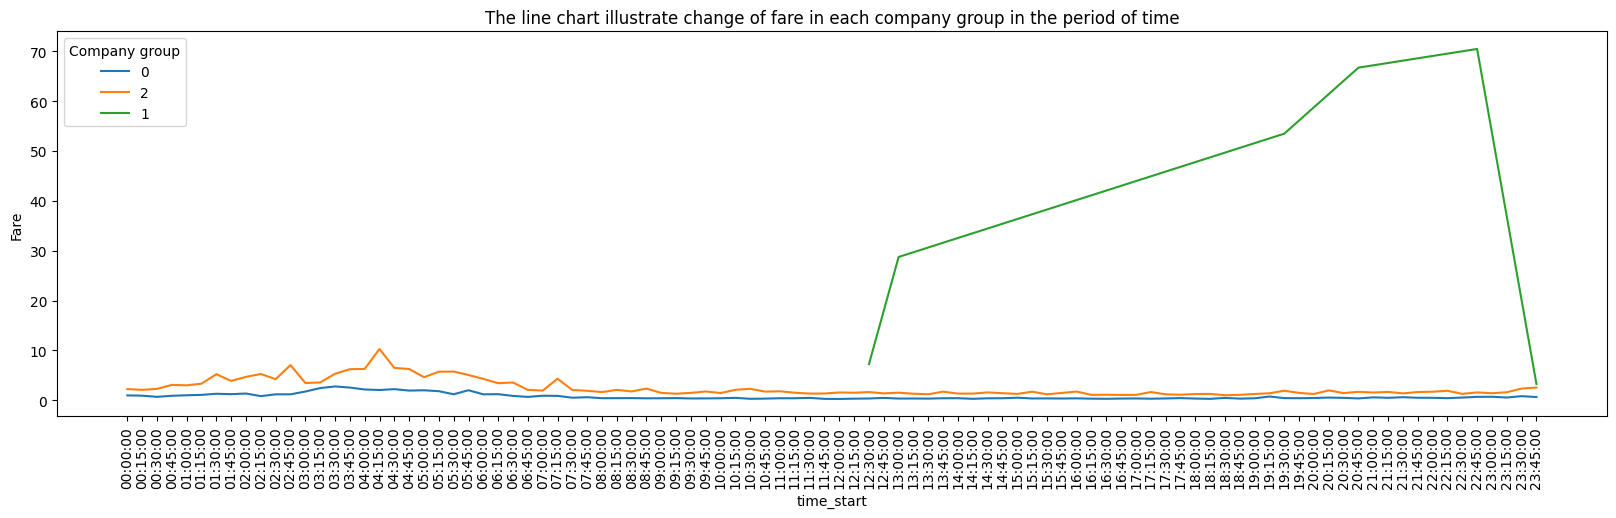

In [34]:
plt.figure(figsize=(20,5))
sns.lineplot(x= group['time_start'], y = group['Fare'], hue=group['Company group'])
plt.xticks(rotation = 90)
plt.title('The line chart illustrate change of fare in each company group in the period of time')
plt.show()

Fare of group 0 and 2 remain stable during the period of time while the figure of group 1 increase sharply to 60$ from 12pm to 23pm.


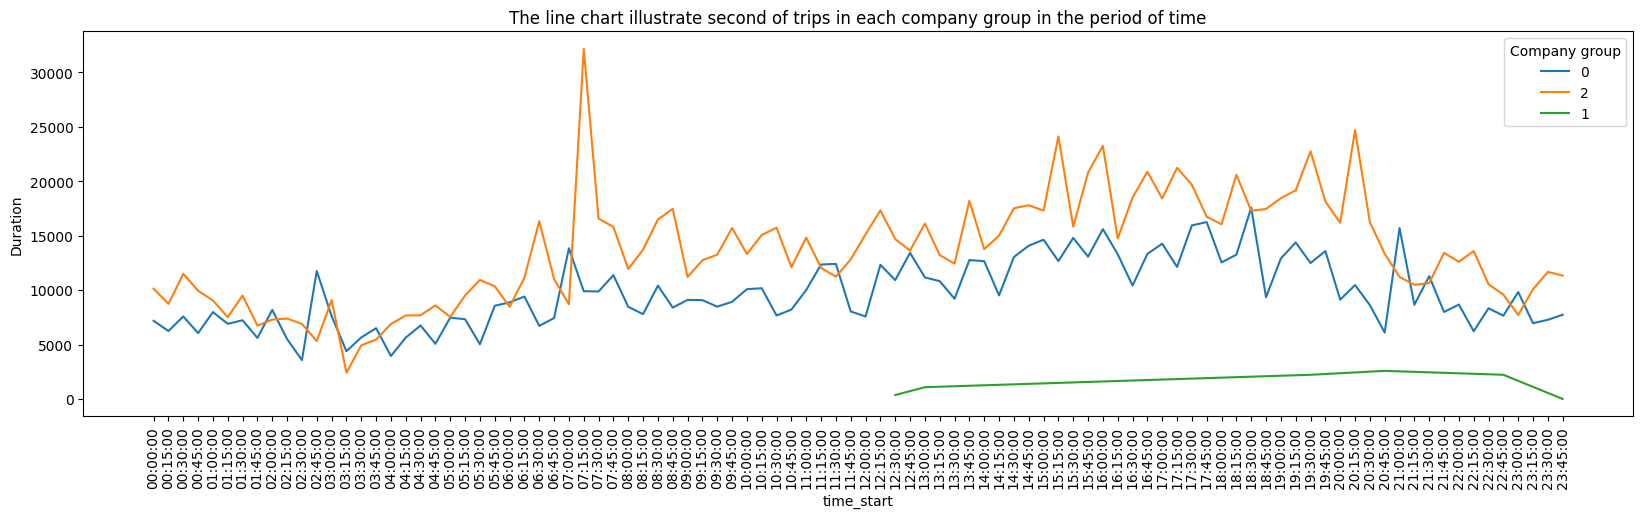

In [35]:
plt.figure(figsize=(20,5))
sns.lineplot(x= group['time_start'], y = group['Duration'], hue=group['Company group'])
plt.xticks(rotation = 90)
plt.title('The line chart illustrate second of trips in each company group in the period of time')
plt.show()

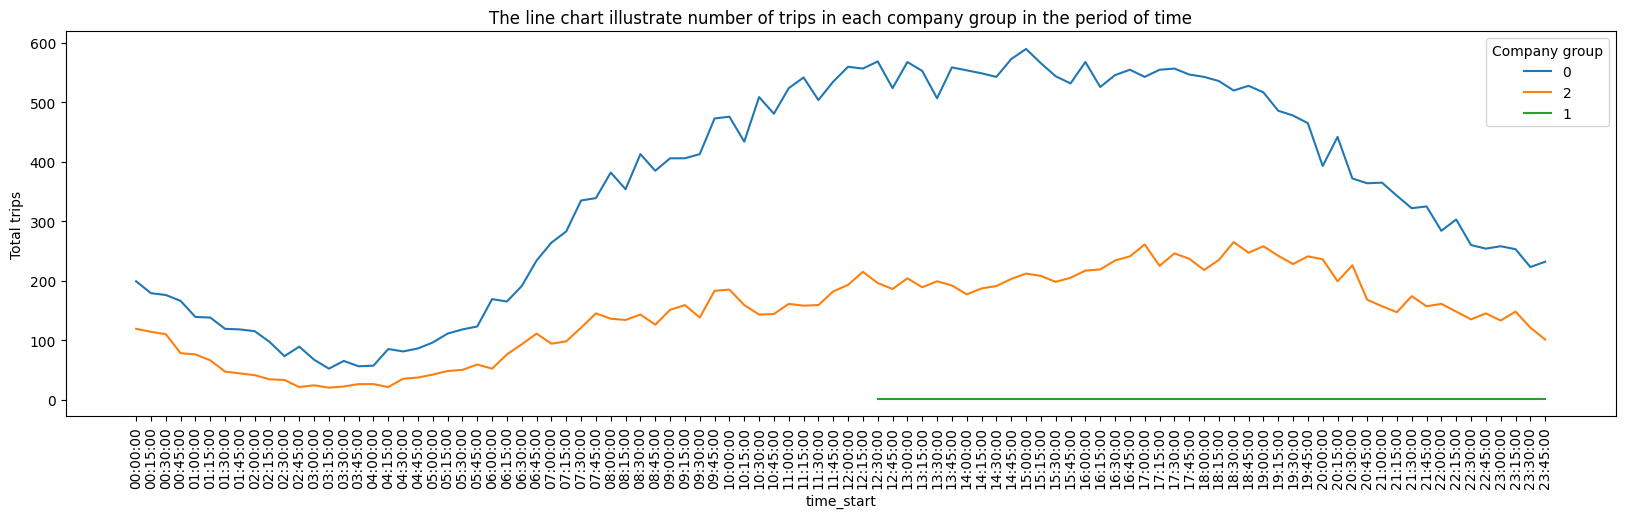

In [36]:
plt.figure(figsize=(20,5))
sns.lineplot(x= group['time_start'], y = group['Total trips'], hue=group['Company group'])
plt.xticks(rotation = 90)
plt.title('The line chart illustrate number of trips in each company group in the period of time')
plt.show()

The analysis highlights potential customer segmentation based on trip characteristics. There is overlap between the customer base of group 0 and group 2. However, Group 2 likely offers a higher quality of service, which explains their higher total cost despite potentially serving some of the same clientele. On the other hand, group 1 appears to specialize in long-distance trips.

## **Holiday**

In [37]:
import datetime

def is_holidays(date):
  holidays = [
      datetime.date(year, month, day)
      for year in range(date.year, date.year + 10)
      for month, day in [(1, 1), (1, 16), (2, 20), (5, 29), (7, 4), (9, 4), (10, 9), (11, 11), (11, 23), (12, 25)]

  ]
# Check if the given date is in the list of holidays
  return date in holidays

# Create a new column in the DataFrame to indicate holidays
df['holiday'] = df['trip_startdate'].apply(is_holidays)

# Display the first few rows of the DataFrame
df.head()


,unique_key,taxi_id,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_community_area,dropoff_community_area,fare,tips,...,company,trip_startdate,trip_enddate,time_start,year,month,quarter,month_name,trip_duration_days,holiday
0,769974aaa7535f9a826e6b568eb220bdc096c81b,1e17dd9f6bce9b805ec3f6c6b510caa5a64e4b67e9f3b7...,2022-10-31 23:45:00 UTC,2022-11-01 00:15:00 UTC,1639.0,19.20,76.0,28.0,46.50,5.0,...,City Service,2022-10-31,2022-11-01,23:45:00,2022,10,4,October,1.0,False
1,769b21b7a6c2f3e401ea0988b4e6b09bd5791d14,d0cd60cfd2405562733ddd1ea3aba9be5ce4f20bc622c5...,2022-10-31 21:00:00 UTC,2022-11-01 10:30:00 UTC,48669.0,5.82,6.0,2.0,17.25,0.0,...,Sun Taxi,2022-10-31,2022-11-01,21:00:00,2022,10,4,October,1.0,False
2,740069ba557902107f219c918fd46a156fabf37c,1d25c733bf526c55bcf3db1fd3856ba10b1064bd98ffce...,2022-10-31 23:45:00 UTC,2022-11-01 00:15:00 UTC,1800.0,18.50,56.0,3.0,45.50,0.0,...,Taxi Affiliation Services,2022-10-31,2022-11-01,23:45:00,2022,10,4,October,1.0,False
3,491f41977a38306f5b1d89de3e87168514d004f1,c57508f365f1bdac3be5e7de12fb19c8d669c37d515e41...,2022-10-31 23:45:00 UTC,2022-11-01 00:00:00 UTC,376.0,1.22,28.0,8.0,6.50,3.0,...,5 Star Taxi,2022-10-31,2022-11-01,23:45:00,2022,10,4,October,1.0,False
4,3cb522b4686547f72806aba7316cc39999f3055e,ddc0a237498a82a0803761188d0ea048623b5d91f29ad2...,2022-10-31 19:30:00 UTC,2022-11-01 04:00:00 UTC,30203.0,0.00,60.0,60.0,3.25,0.0,...,Flash Cab,2022-10-31,2022-11-01,19:30:00,2022,10,4,October,1.0,False


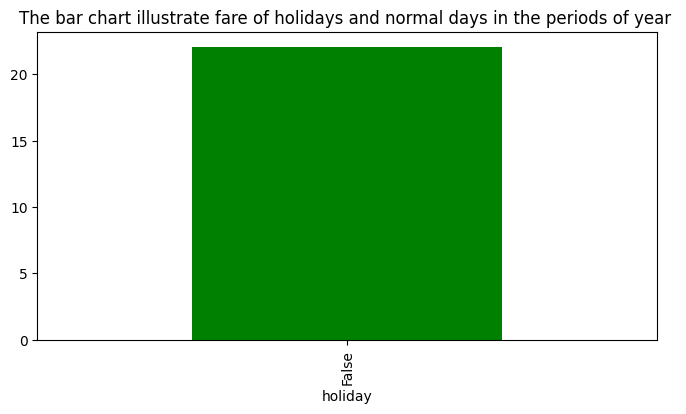

holiday
False    22.08
Name: fare, dtype: float64


In [38]:
#create bar chart compare fare between holidays and normal days
plt.figure(figsize = (8,4))
df.groupby(['holiday'])['fare'].mean().plot(kind = 'bar', color = 'g')
plt.title('The bar chart illustrate fare of holidays and normal days in the periods of year ')
plt.show()
# fare information
print(df.groupby(['holiday'])['fare'].mean().round(2))

The fare of holidyas was higher than the figure of normal days. From this results, the fare counld be increased on the festival and holiday  by the taxi company.

In [39]:
# merge company group to ph dataframe
df = df.merge(com[['company','Company group']], on='company', how='left')
df.head()

,unique_key,taxi_id,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_community_area,dropoff_community_area,fare,tips,...,trip_startdate,trip_enddate,time_start,year,month,quarter,month_name,trip_duration_days,holiday,Company group
0,769974aaa7535f9a826e6b568eb220bdc096c81b,1e17dd9f6bce9b805ec3f6c6b510caa5a64e4b67e9f3b7...,2022-10-31 23:45:00 UTC,2022-11-01 00:15:00 UTC,1639.0,19.20,76.0,28.0,46.50,5.0,...,2022-10-31,2022-11-01,23:45:00,2022,10,4,October,1.0,False,2
1,769b21b7a6c2f3e401ea0988b4e6b09bd5791d14,d0cd60cfd2405562733ddd1ea3aba9be5ce4f20bc622c5...,2022-10-31 21:00:00 UTC,2022-11-01 10:30:00 UTC,48669.0,5.82,6.0,2.0,17.25,0.0,...,2022-10-31,2022-11-01,21:00:00,2022,10,4,October,1.0,False,0
2,740069ba557902107f219c918fd46a156fabf37c,1d25c733bf526c55bcf3db1fd3856ba10b1064bd98ffce...,2022-10-31 23:45:00 UTC,2022-11-01 00:15:00 UTC,1800.0,18.50,56.0,3.0,45.50,0.0,...,2022-10-31,2022-11-01,23:45:00,2022,10,4,October,1.0,False,0
3,491f41977a38306f5b1d89de3e87168514d004f1,c57508f365f1bdac3be5e7de12fb19c8d669c37d515e41...,2022-10-31 23:45:00 UTC,2022-11-01 00:00:00 UTC,376.0,1.22,28.0,8.0,6.50,3.0,...,2022-10-31,2022-11-01,23:45:00,2022,10,4,October,1.0,False,0
4,3cb522b4686547f72806aba7316cc39999f3055e,ddc0a237498a82a0803761188d0ea048623b5d91f29ad2...,2022-10-31 19:30:00 UTC,2022-11-01 04:00:00 UTC,30203.0,0.00,60.0,60.0,3.25,0.0,...,2022-10-31,2022-11-01,19:30:00,2022,10,4,October,1.0,False,0


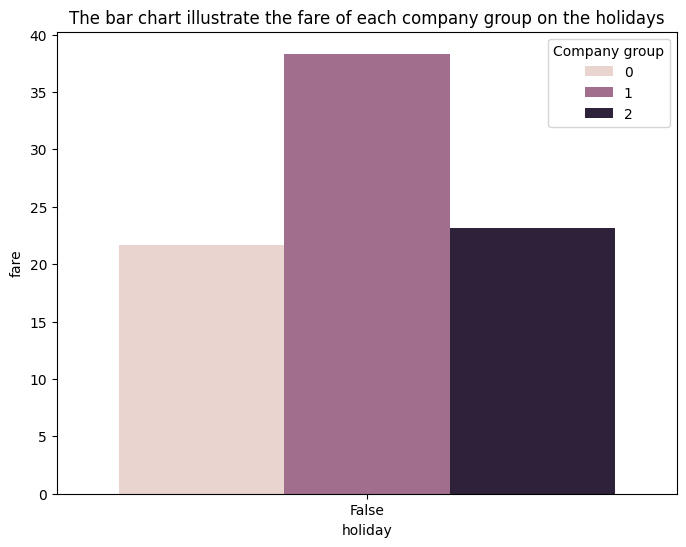

   holiday  Company group   fare
0    False              0  21.64
1    False              1  38.33
2    False              2  23.14


In [40]:
hol_com = df.groupby(['holiday','Company group'])['fare'].mean().round(2).reset_index()
plt.figure(figsize = (8,6))
sns.barplot(x = hol_com['holiday'], y = hol_com['fare'], hue = hol_com['Company group'])
plt.title('The bar chart illustrate the fare of each company group on the holidays')
plt.show()

print(hol_com)

The fare of company group 2 increased significatly to 30$ on the holidays while the figure of other company group have minimal raise to approximately 2$.


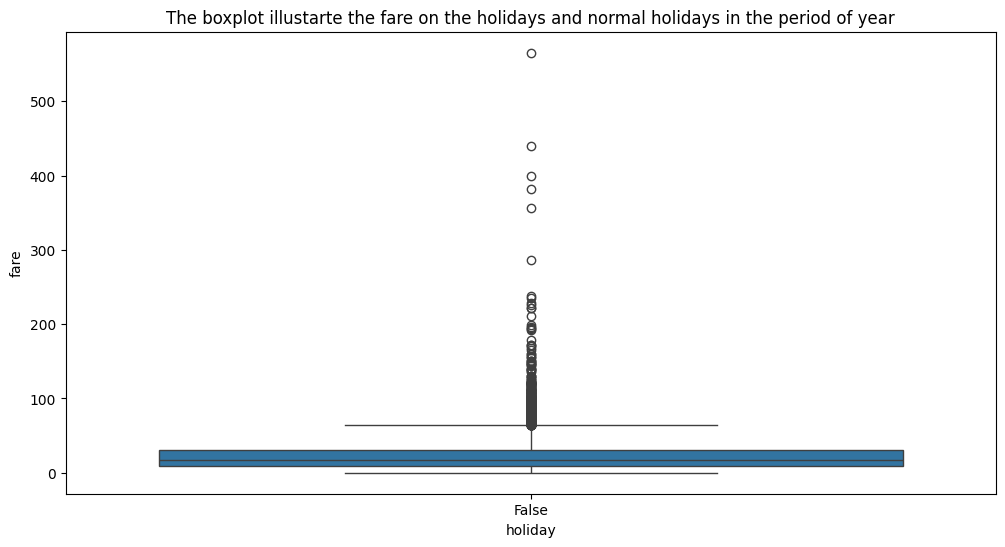

In [41]:
# Analyze holiday variable and fare variable
ho_fa = df[['holiday','fare']]

# create boxplot
plt.figure(figsize = (12,6))
sns.boxplot(x=ho_fa['holiday'], y = ho_fa['fare'])
plt.title('The boxplot illustarte the fare on the holidays and normal holidays in the period of year')
plt.show()


In [42]:
#replace False and True values in the holiday column with 0 and 1 respectively.
# ho_fa['holiday_cat'] = np.where(ho_fa['holiday']=='False',0,1)
ho_fa['holiday'] = ho_fa['holiday'].map({False:0, True:1})
ho_fa.value_counts()


holiday  fare  
0        3.25      2189
         11.00     1168
         9.00       927
         9.45       813
         30.00      728
                   ... 
         28.99        1
         28.95        1
         28.90        1
         28.89        1
         565.25       1
Name: count, Length: 2332, dtype: int64

In [43]:
import statsmodels.api as sm
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Convert to categorical
ho_fa['holiday'] = ho_fa['holiday'].astype('category')

model = ols('fare ~ C(holiday)', data=ho_fa).fit()
anova_table = sm.stats.anova_lm(model)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
C(holiday),0.0,0.000000e+00,NaN,NaN,NaN
Residual,48107.0,1.391466e+07,289.24405,NaN,NaN


Overall, the ANOVA test suggests that there is a statistically significant difference in fare between holidays and non-holidays. However, the F-statistic is relatively low, which suggests that the model explains a small portion of the total variance in fare. This may be due to other factors that are not included in the model, such as time of day, route, or passenger demand.

## **Weekdays**

In [44]:
df['weekday'] = df['trip_startdate'].dt.weekday

# To get the weekday name instead of the weekday number
df['weekday_name'] = df['trip_startdate'].dt.day_name()
df.head(20)

,unique_key,taxi_id,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_community_area,dropoff_community_area,fare,tips,...,time_start,year,month,quarter,month_name,trip_duration_days,holiday,Company group,weekday,weekday_name
0,769974aaa7535f9a826e6b568eb220bdc096c81b,1e17dd9f6bce9b805ec3f6c6b510caa5a64e4b67e9f3b7...,2022-10-31 23:45:00 UTC,2022-11-01 00:15:00 UTC,1639.0,19.20,76.0,28.0,46.50,5.00,...,23:45:00,2022,10,4,October,1.0,False,2,0,Monday
1,769b21b7a6c2f3e401ea0988b4e6b09bd5791d14,d0cd60cfd2405562733ddd1ea3aba9be5ce4f20bc622c5...,2022-10-31 21:00:00 UTC,2022-11-01 10:30:00 UTC,48669.0,5.82,6.0,2.0,17.25,0.00,...,21:00:00,2022,10,4,October,1.0,False,0,0,Monday
2,740069ba557902107f219c918fd46a156fabf37c,1d25c733bf526c55bcf3db1fd3856ba10b1064bd98ffce...,2022-10-31 23:45:00 UTC,2022-11-01 00:15:00 UTC,1800.0,18.50,56.0,3.0,45.50,0.00,...,23:45:00,2022,10,4,October,1.0,False,0,0,Monday
3,491f41977a38306f5b1d89de3e87168514d004f1,c57508f365f1bdac3be5e7de12fb19c8d669c37d515e41...,2022-10-31 23:45:00 UTC,2022-11-01 00:00:00 UTC,376.0,1.22,28.0,8.0,6.50,3.00,...,23:45:00,2022,10,4,October,1.0,False,0,0,Monday
4,3cb522b4686547f72806aba7316cc39999f3055e,ddc0a237498a82a0803761188d0ea048623b5d91f29ad2...,2022-10-31 19:30:00 UTC,2022-11-01 04:00:00 UTC,30203.0,0.00,60.0,60.0,3.25,0.00,...,19:30:00,2022,10,4,October,1.0,False,0,0,Monday
5,53b8005bd184735642dedd48114e37706b077e96,12bfcfb8715a63cacb9a4bc127f622071bab27b36a8488...,2022-10-31 23:45:00 UTC,2022-11-01 00:15:00 UTC,1637.0,11.03,28.0,2.0,30.50,0.00,...,23:45:00,2022,10,4,October,1.0,False,0,0,Monday
6,5c348933f706038674cc154719ec9f936dbe5b5d,c50a9a5429a22e934bf88c9a13e08de2ea5b35bd4f78a8...,2022-11-01 00:00:00 UTC,2022-11-01 00:15:00 UTC,1472.0,12.80,NaN,NaN,32.75,0.00,...,00:00:00,2022,11,4,November,0.0,False,2,1,Tuesday
7,8e8362a92ca93c67142006d51a4ebb5ae0dfc073,e1b3ecea44f9558d957d370ef239868c23125e1c6b2885...,2022-10-31 23:45:00 UTC,2022-11-01 00:00:00 UTC,1080.0,0.60,6.0,38.0,28.25,0.00,...,23:45:00,2022,10,4,October,1.0,False,0,0,Monday
8,96e9da54b69902b5d51e27b6fec1221a41a8453c,51e37146cd6467734e50a00ffe2ebbb77ee35e5f207817...,2022-11-01 00:00:00 UTC,2022-11-01 00:15:00 UTC,1535.0,13.99,56.0,7.0,36.50,8.40,...,00:00:00,2022,11,4,November,0.0,False,2,1,Tuesday
9,f1a4b7498c3daee05b71777f515281ffed51c21a,342474dd3a24c9d5b7dbc2514032a01ecb396624638be5...,2023-12-25 19:15:00 UTC,2023-12-25 19:15:00 UTC,180.0,0.00,76.0,76.0,4.00,0.00,...,19:15:00,2023,12,4,December,0.0,False,0,0,Monday


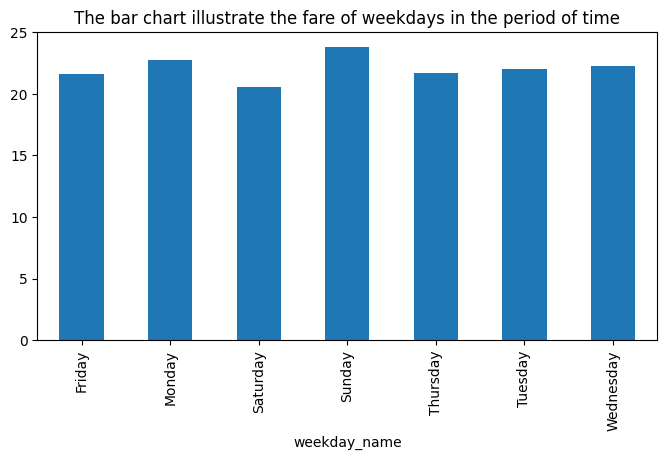

weekday_name
Friday       21.58
Monday       22.71
Saturday     20.52
Sunday       23.82
Thursday     21.68
Tuesday      22.00
Wednesday    22.26
Name: fare, dtype: float64


In [45]:
plt.figure(figsize = (8,4))
df.groupby(['weekday_name'])['fare'].mean().round(2).plot(kind = 'bar')
plt.title('The bar chart illustrate the fare of weekdays in the period of time')
plt.show()

print(df.groupby(['weekday_name'])['fare'].mean().round(2))

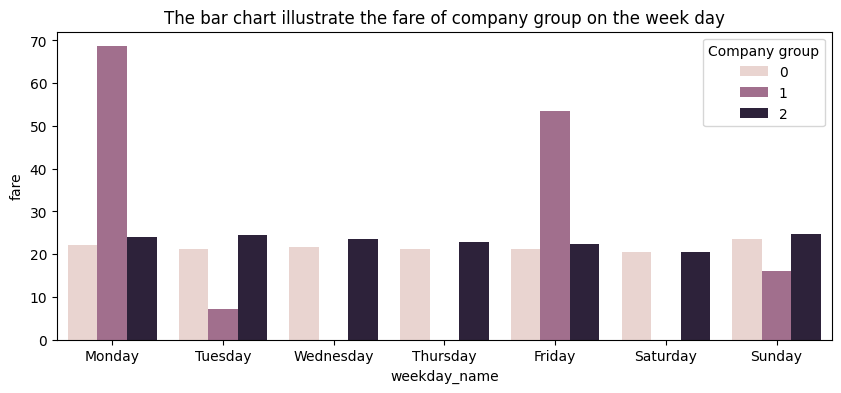

In [46]:
wd_com = df.groupby(['Company group','weekday_name','weekday'])['fare'].mean().reset_index().round(2).sort_values(by = 'weekday', ascending = True)

plt.figure(figsize = (10,4))
sns.barplot(x = wd_com['weekday_name'], y = wd_com['fare'], hue = wd_com['Company group'])
plt.title('The bar chart illustrate the fare of company group on the week day')
plt.show()

In [47]:
model = ols('fare ~ C(weekday)', data = wd_com).fit()
anova_table = sm.stats.anova_lm(model)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
C(weekday),6.0,960.831717,160.138619,0.777571,0.604144
Residual,11.0,2265.418483,205.947135,NaN,NaN


The p-value (0.6041) is greater than 0.05, which means we fail to reject the null hypothesis. In other words, there is not enough evidence to conclude that there is a statistically significant difference in fare between weekdays.

In [48]:
wd_com['Company group'] = wd_com['Company group'].astype('category')
wd_com['weekday'] = wd_com['weekday'].astype('category')
wd_com.rename(columns = ({'Company group':'company_group'}), inplace = True)

In [49]:
import statsmodels.formula.api as smf
import statsmodels.api as sm
import statsmodels.stats.anova as anova

# Re-fit the regression model
model = smf.ols('fare ~ C(weekday) + C(company_group)', data=wd_com).fit()

# Perform ANOVA test
anova_table = sm.stats.anova_lm(model)
print(anova_table)

                   df       sum_sq     mean_sq         F    PR(>F)
C(weekday)        6.0   960.831717  160.138619  0.811017  0.586712
C(company_group)  2.0   488.332614  244.166307  1.236573  0.335367
Residual          9.0  1777.085869  197.453985       NaN       NaN


## **Payment types**

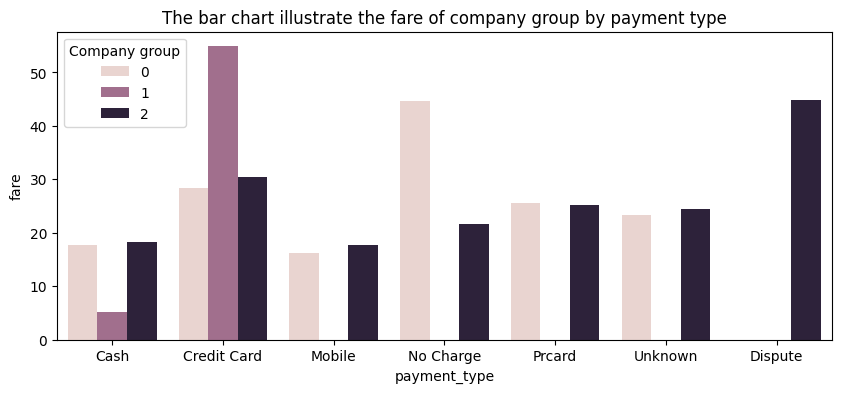

In [50]:
pay = df.groupby(['Company group', 'payment_type'])['fare'].mean().round(2).reset_index()

plt.figure(figsize = (10,4))
sns.barplot(x = pay['payment_type'], y = pay['fare'], hue = pay['Company group'])
plt.title('The bar chart illustrate the fare of company group by payment type')
plt.show()

In [51]:
pay.rename(columns =({'Company group':'company_group'}), inplace = True)

# Re-fit the regression model
model = smf.ols('fare ~ C(payment_type) + C(company_group)', data=pay).fit()

# Perform ANOVA test
anova_table = sm.stats.anova_lm(model)
print(anova_table)

                   df       sum_sq     mean_sq         F    PR(>F)
C(payment_type)   6.0  1498.423110  249.737185  2.058973  0.200449
C(company_group)  2.0    81.182608   40.591304  0.334657  0.728132
Residual          6.0   727.752775  121.292129       NaN       NaN


## **Pickup location**

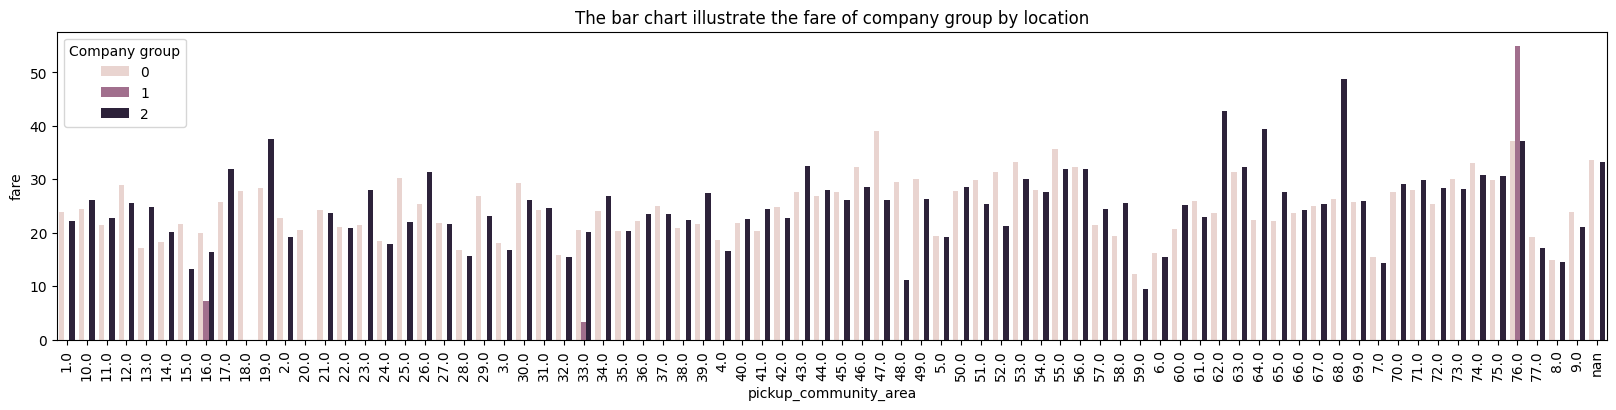

In [52]:
df['pickup_community_area'] = df['pickup_community_area'].astype(str)

pay = df.groupby(['Company group', 'pickup_community_area'])['fare'].mean().round(2).reset_index()

plt.figure(figsize = (20,4))
sns.barplot(x = pay['pickup_community_area'], y = pay['fare'], hue = pay['Company group'])
plt.title('The bar chart illustrate the fare of company group by location')
plt.xticks(rotation = 90)
plt.show()

# **Fare prediction**

## **Data pre-processing**

In [53]:
df1 = df[['trip_seconds','trip_miles','fare','payment_type','Company group','holiday','weekday']]
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48108 entries, 0 to 48107
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   trip_seconds   48102 non-null  float64
 1   trip_miles     48108 non-null  float64
 2   fare           48108 non-null  float64
 3   payment_type   48108 non-null  object 
 4   Company group  48108 non-null  int32  
 5   holiday        48108 non-null  bool   
 6   weekday        48108 non-null  int32  
dtypes: bool(1), float64(3), int32(2), object(1)
memory usage: 1.9+ MB


In [54]:
# Replace null with 0
df1['trip_seconds'] = df1['trip_seconds'].fillna(0)

df1.rename(columns = ({'Company group': 'company_group'}), inplace = True)

#change type of data
df1['holiday'] = df1['holiday'].astype('category')
df1['weekday'] = df1['weekday'].astype('category')
df1['payment_type'] = df1['payment_type'].astype('category')
df1['company_group'] = df1['company_group'].astype('category')

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48108 entries, 0 to 48107
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   trip_seconds   48108 non-null  float64 
 1   trip_miles     48108 non-null  float64 
 2   fare           48108 non-null  float64 
 3   payment_type   48108 non-null  category
 4   company_group  48108 non-null  category
 5   holiday        48108 non-null  category
 6   weekday        48108 non-null  category
dtypes: category(4), float64(3)
memory usage: 1.3 MB


<Figure size 800x600 with 0 Axes>

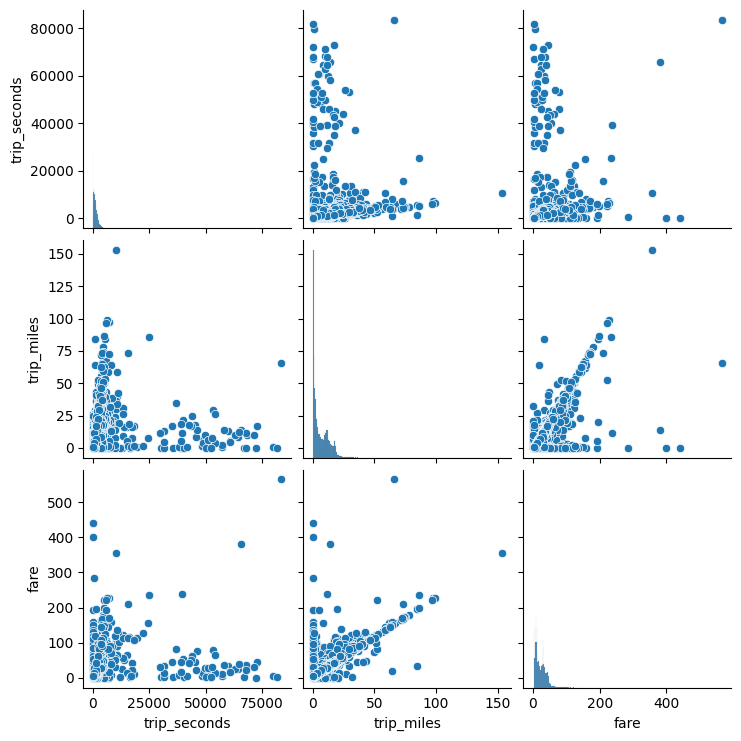

In [55]:
plt.figure(figsize = (8,6))
sns.pairplot(df1)
plt.show()

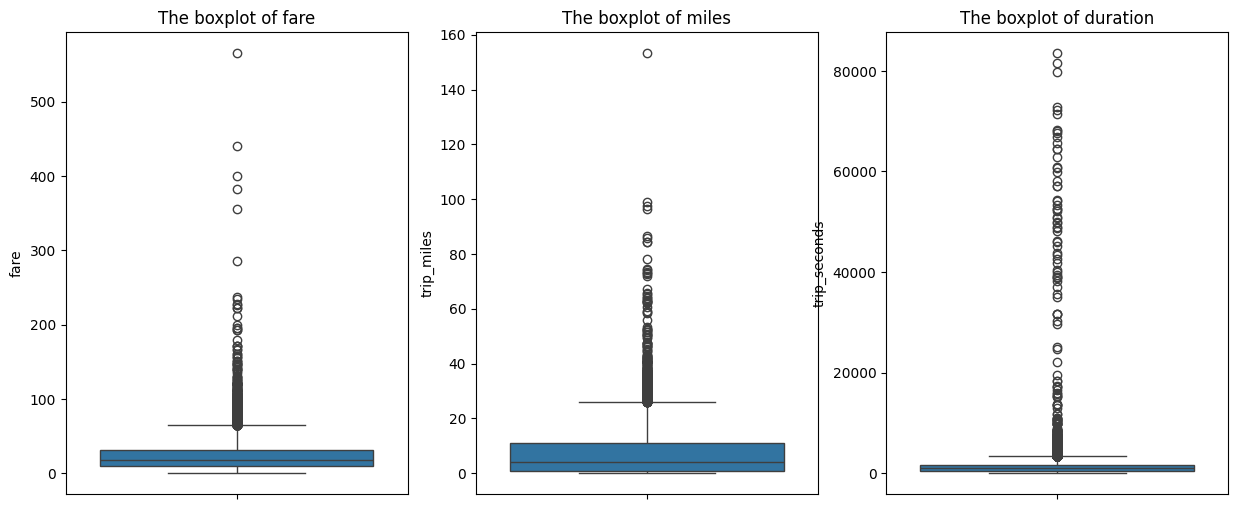

In [56]:
f, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (15,6))
sns.boxplot(df1['fare'], ax = ax1).set_title('The boxplot of fare')
sns.boxplot(df1['trip_miles'], ax = ax2).set_title('The boxplot of miles')
sns.boxplot(df1['trip_seconds'], ax = ax3).set_title('The boxplot of duration')
plt.show()

### **Convert category data to numberical code**

In [57]:
df1['holiday'] = df1['holiday'].map({False:0, True:1})

from sklearn.preprocessing import LabelEncoder

# create a LabelEncoder object
label_encoder = LabelEncoder()

# create a new column with the encoded values
df1['encoded_payment_type'] = label_encoder.fit_transform(df1['payment_type'])


In [58]:
df1['encoded_payment_type'] = df1['encoded_payment_type'].astype('category')

In [59]:
X = df1.drop(columns = ['fare','payment_type'])
Y = df1['fare']
Y = np.array(Y)

## **Compare models**

In [60]:
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split

def evaluate_model(model, X_train, X_test, y_train, y_test, metrics):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    model_metrics = {}
    for metric in metrics:
        if metric == "MSE":
            model_metrics[metric] = mean_squared_error(y_test, y_pred)
        elif metric == "R2":
            model_metrics[metric] = r2_score(y_test, y_pred)
        elif metric == "MAE":
            model_metrics[metric] = mean_absolute_error(y_test, y_pred)
    return model_metrics

def compare_models(X, y, metrics=["MSE", "R2", "MAE"]):
    # Define the models to compare
    models = {
        "DTR": DecisionTreeRegressor(random_state=42),
        "RFR": RandomForestRegressor(n_estimators=250, random_state=42),
    }

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

    # Evaluate each model and store the results
    results = {}
    for name, model in models.items():
        model_metrics = evaluate_model(model, X_train, X_test, y_train, y_test, metrics)
        results[name] = model_metrics

    # Print the results
    print(f"Model Comparison:\n{'-' * 30}")
    for model_name, model_metrics in results.items():
        print(f"{model_name:<15}")
        for metric, value in model_metrics.items():
            print(f"| {metric:<10} | {value:.4f}")
    print("")


# Call the function
# Replace `X` and `y` with the actual data
compare_models(X, Y)

Model Comparison:
------------------------------
DTR            
| MSE        | 96.6009
| R2         | 0.6382
| MAE        | 2.7651
RFR            
| MSE        | 57.7852
| R2         | 0.7836
| MAE        | 2.3230



The RFR model appears to perform better on this dataset compared to the DTR model. Here's a breakdown of the metrics:

**- Mean Squared Error (MSE):** The RFR model has a significantly lower MSE (57.8429) compared to the DTR model (100.4423). *MSE measures the average squared difference between the predicted values and the actual values.* A lower MSE indicates a better fit for the model. In this case, the RFR model's predictions are closer to the actual values on average.


**- R-squared (R²) :**The RFR model also has a higher R² (0.7833) compared to the DTR model (0.6238). *R² is a statistical measure that represents the proportion of the variance in the dependent variable that is explained by the independent variables.* A higher R² value indicates a better fit. Here, the RFR model explains more of the variance in the data compared to the DTR model.


**- Mean Absolute Error (MAE):** The MAE values are fairly similar for both models (2.7951 for DTR and 2.3231 for RFR). *MAE represents the average absolute difference between the predicted values and the actual values.* A lower MAE indicates better accuracy. While the RFR model has a slightly lower MAE, the difference is not substantial in this case.

## **Random Forest Model**

### **Select improtant fearures**

In [61]:
# Assuming X and y are your dataset's features and target variable
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

# Train the RFR model
rfr = RandomForestRegressor(n_estimators=250, random_state=42)
rfr.fit(X_train, y_train)

# Get the feature importances
feature_importances = rfr.feature_importances_

# Create a DataFrame with the feature names and their importances
importances_df = pd.DataFrame({"feature": X_train.columns, "importance": feature_importances})

# Sort the DataFrame by the importance column in descending order
importances_df = importances_df.sort_values("importance", ascending=False)

# Print the sorted DataFrame
print(importances_df)

                feature  importance
1            trip_miles    0.740064
0          trip_seconds    0.204862
4               weekday    0.028504
5  encoded_payment_type    0.018259
2         company_group    0.008311
3               holiday    0.000000


### **Select best parameters**

In [62]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Define the hyperparameter grid
param_grid = {
    "n_estimators": [50, 100, 200, 250, 300],
    "max_depth": [None, 10, 20, 30, 40, 50],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "bootstrap": [True, False],
}

# Create a randomized search object
random_search = RandomizedSearchCV(
    RandomForestRegressor(random_state=42),
    param_distributions=param_grid,
    n_iter=100,
    cv=5,
    scoring="neg_mean_squared_error",
    random_state=42,
    n_jobs=-1,
)

# Fit the randomized search object to the data
random_search.fit(X_train, y_train)

# Print the best parameters and the corresponding score
print(f"Best Parameters: {random_search.best_params_}")
print(f"Best Score: {-random_search.best_score_:.4f}")

Best Parameters: {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_depth': 10, 'bootstrap': True}
Best Score: 60.1480


### **Build model**

In [63]:
X = df1.drop(columns = ['fare','payment_type','holiday'])
Y = df1['fare']
Y = np.array(Y)

In [64]:
def better_model(model, X_train, X_test, y_train, y_test, metrics):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    model_metrics = {}
    for metric in metrics:
        if metric == "MSE":
            model_metrics[metric] = mean_squared_error(y_test, y_pred)
        elif metric == "R2":
            model_metrics[metric] = r2_score(y_test, y_pred)
        elif metric == "MAE":
            model_metrics[metric] = mean_absolute_error(y_test, y_pred)
    return model_metrics

def models(X, y, metrics=["MSE", "R2", "MAE"]):
    models = {
        "RFR": RandomForestRegressor(n_estimators=250, random_state=42),
    }

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

    # Evaluate each model and store the results
    results = {}
    for name, model in models.items():
        model_metrics = better_model(model, X_train, X_test, y_train, y_test, metrics)
        results[name] = model_metrics

    # Print the results
    print(f"Model Comparison:\n{'-' * 30}")
    for model_name, model_metrics in results.items():
        print(f"{model_name:<15}")
        for metric, value in model_metrics.items():
            print(f"| {metric:<10} | {value:.4f}")
    print("")

models(X, Y)

Model Comparison:
------------------------------
RFR            
| MSE        | 57.6298
| R2         | 0.7841
| MAE        | 2.3231



Mean Squared Error: 48.4997
R-squared Score: 0.8183


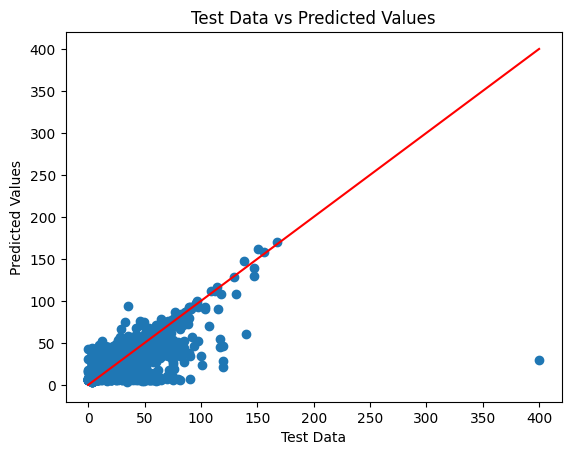

In [68]:

# Get the best model from the randomized search
best_model = RandomForestRegressor(n_estimators=100, min_samples_split=10, min_samples_leaf=4, max_depth=10, bootstrap=True)

# Train the best model on the full training data
best_model.fit(X_train, y_train)

# Predict the test data
y_pred = best_model.predict(X_test)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.4f}")

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)
print(f"R-squared Score: {r2:.4f}")


# Plot the test data and predicted values
plt.scatter(y_test, y_pred)
plt.xlabel("Test Data")
plt.ylabel("Predicted Values")
plt.title("Test Data vs Predicted Values")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.show()

In [95]:
y_test_predict=pd.DataFrame(
   best_model.predict(X_test)).rename(
    columns={0:'predicted_fare'})
y_test =pd.DataFrame(
   y_test).rename(
    columns={0:'test_fare'})

# Create a new column with a unique identifier in both dataframes
y_test['id'] = range(len(y_test))
y_test_predict['id'] = range(len(y_test_predict))

# Merge the dataframes using the 'id' column
RF_predict = y_test.merge(y_test_predict, on='id')

# Drop the 'id' column
RF_predict = RF_predict.drop('id', axis=1)
RF_predict['dff'] = RF_predict['predicted_fare'] - RF_predict['test_fare']
# Print the merged dataframe
RF_predict.head()

,test_fare,predicted_fare,dff
0,30.75,30.545439,-0.204561
1,33.50,36.232121,2.732121
2,28.00,27.784559,-0.215441
3,37.00,38.754765,1.754765
4,8.25,9.523211,1.273211


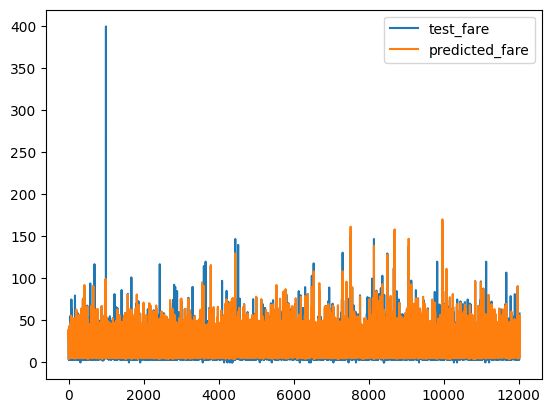

In [99]:
RF_predict[['test_fare', 'predicted_fare']].plot()
plt.show()

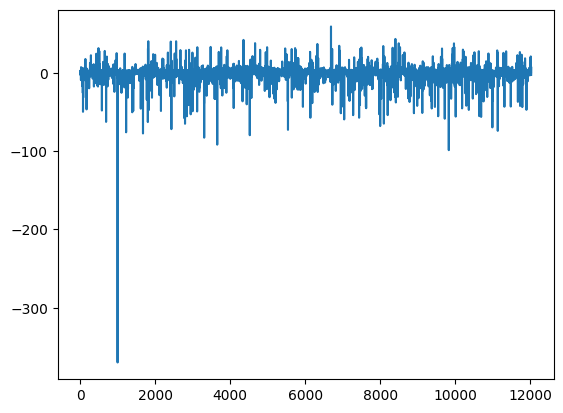

In [100]:
RF_predict['dff'].plot()
plt.show()

### **Export the first three decision trees from the forest**

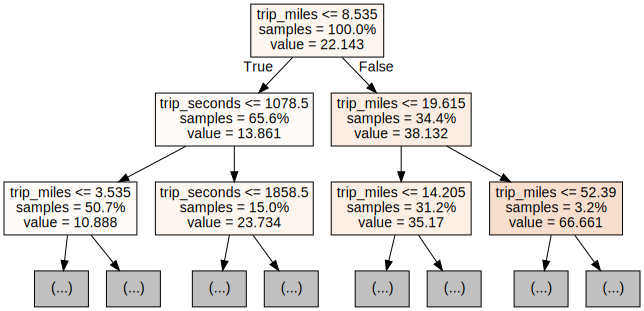

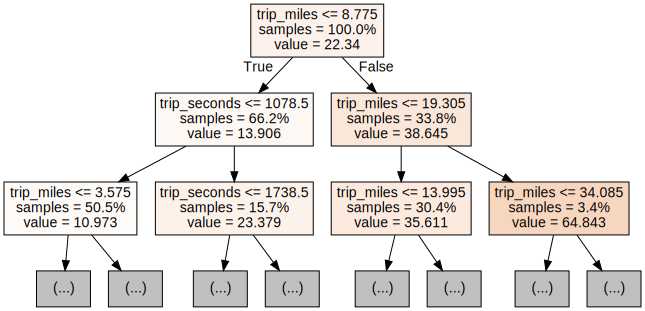

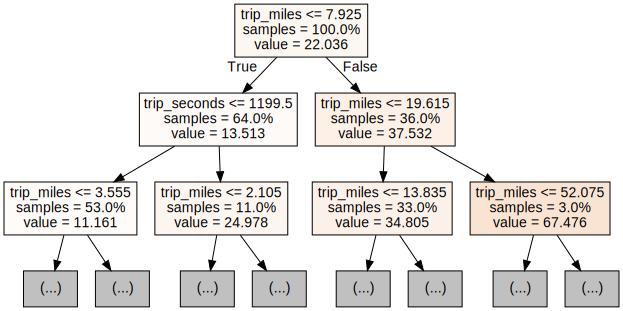

In [70]:
# Export the first three decision trees from the forest
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz
for i in range(3):
    tree = best_model.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train.columns,
                               filled=True,
                               max_depth=2,
                               impurity=False,
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

Each tree image is limited to only showing the first few nodes. These trees can get very large and difficult to visualize. The colors represent the majority class of each node (box, with red indicating majority 0 (no subscription) and blue indicating majority 1 (subscription). The colors get darker the closer the node gets to being fully 0 or 1. Each node also contains the following information:

- The variable name and value used for splitting
- The % of total samples in each split
- The % split between classes in each split